Fold 1 - Accuracy: 0.4215686274509804
Confusion matrix:


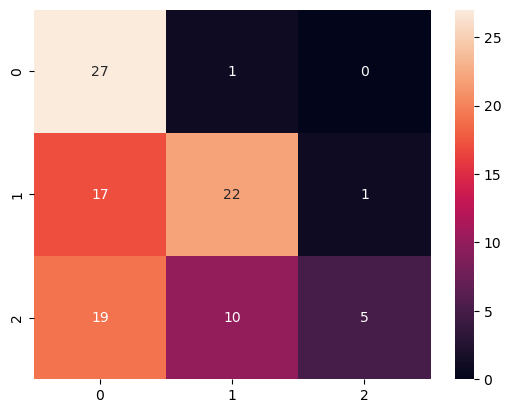

Fold 2 - Accuracy: 0.4411764705882353
Confusion matrix:


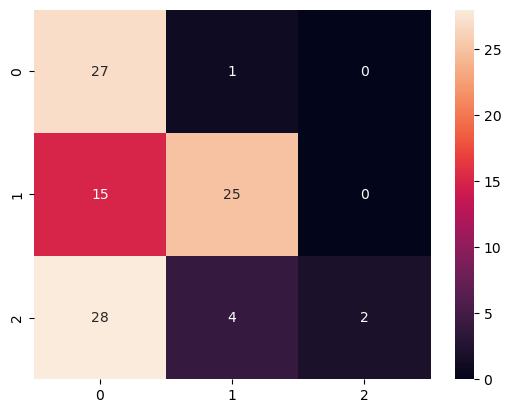

Fold 3 - Accuracy: 0.4215686274509804
Confusion matrix:


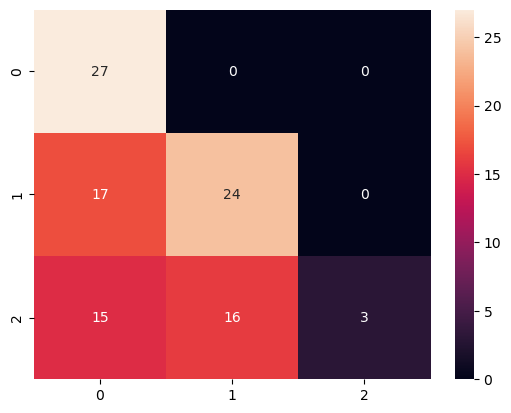

Fold 4 - Accuracy: 0.30392156862745096
Confusion matrix:


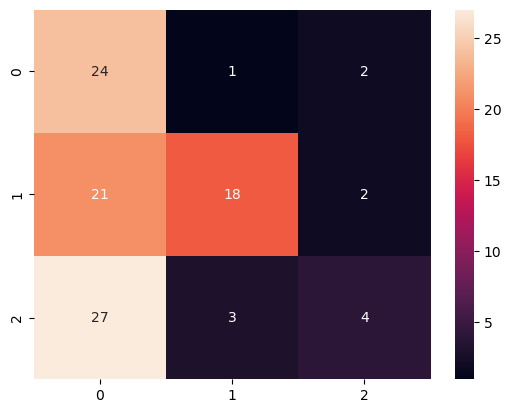

Fold 5 - Accuracy: 0.39603960396039606
Confusion matrix:


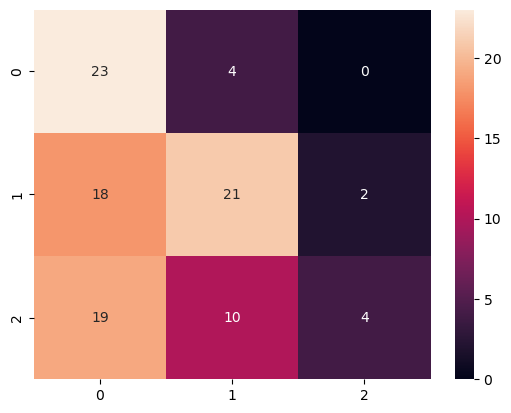

Fold 6 - Accuracy: 0.37623762376237624
Confusion matrix:


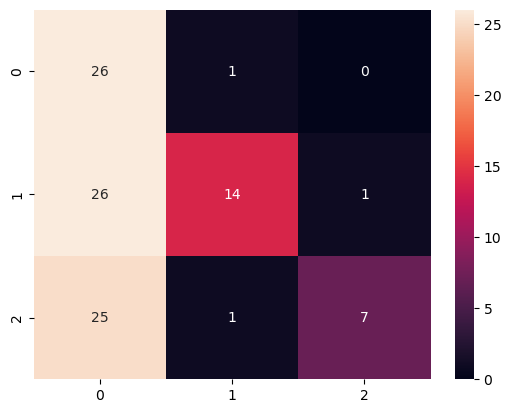

Fold 7 - Accuracy: 0.3465346534653465
Confusion matrix:


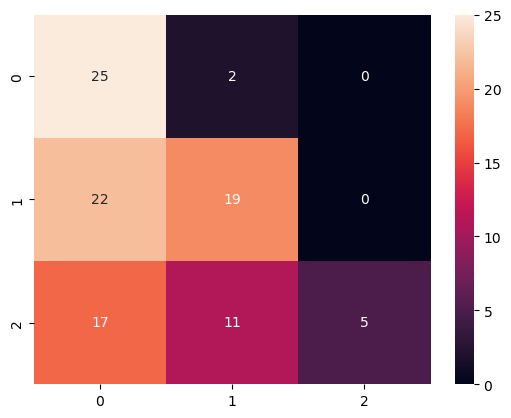

Fold 8 - Accuracy: 0.27722772277227725
Confusion matrix:


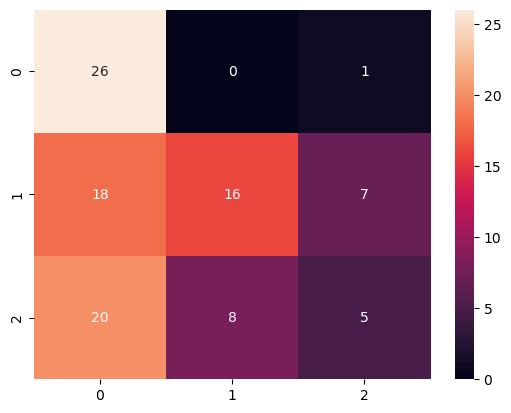

Fold 9 - Accuracy: 0.3564356435643564
Confusion matrix:


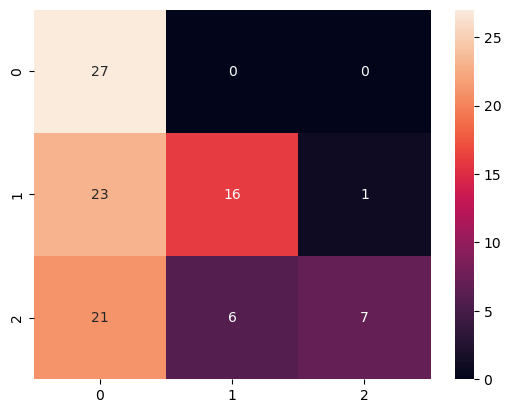

Fold 10 - Accuracy: 0.297029702970297
Confusion matrix:


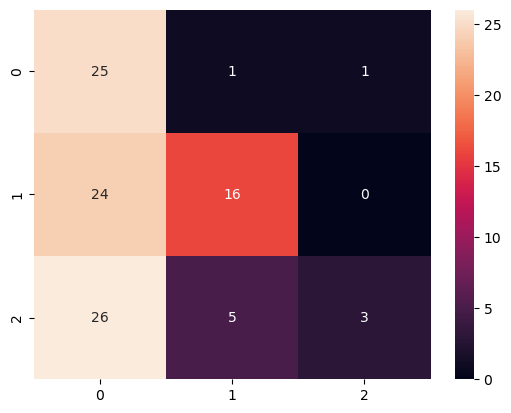

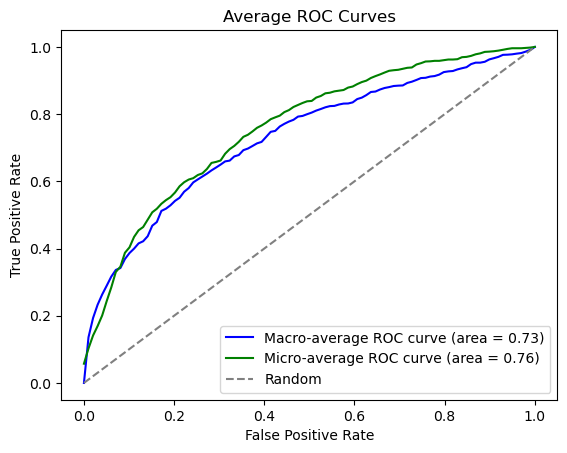

Average Accuracy: 0.3637740244612696
Average Precision: 0.7255230410763425
Average Recall: 0.38754152798509567
Average F1 Score: 0.4710133221977034


In [16]:
#logistic regression
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'RiskLevel' as the target variable
df = pd.read_csv('Dataset.csv')

# Exclude the 'BS' column
X = df.drop(['RiskLevel', 'BS'], axis=1)
y = df['RiskLevel']

skf = StratifiedKFold(n_splits=10)
accuracies = []
precisions = []
recalls = []
f1_scores = []
mean_fpr = np.linspace(0, 1, 100)
macro_tpr_list = []
micro_tpr_list = []

for fold_idx, (train_index, val_index) in enumerate(skf.split(X, y)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    y_train_bin = label_binarize(y_train, classes=np.unique(y))
    y_val_bin = label_binarize(y_val, classes=np.unique(y))

    logreg = OneVsRestClassifier(LogisticRegression(max_iter=1500))
    logreg.fit(X_train, y_train_bin)
    y_val_pred_bin = logreg.predict(X_val)
    y_val_prob_bin = logreg.predict_proba(X_val)

    # Calculating metrics and appending them to the respective lists
    accuracy = accuracy_score(y_val_bin, y_val_pred_bin)
    precision = precision_score(y_val_bin, y_val_pred_bin, average='macro')
    recall = recall_score(y_val_bin, y_val_pred_bin, average='macro')
    f1 = f1_score(y_val_bin, y_val_pred_bin, average='macro')

    # ROC curves
    macro_tpr_fold_list = []
    for i in range(y_train_bin.shape[1]):
        fpr, tpr, _ = roc_curve(y_val_bin[:, i], y_val_prob_bin[:, i])
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        macro_tpr_fold_list.append(interp_tpr)

    micro_fpr, micro_tpr, _ = roc_curve(y_val_bin.ravel(), y_val_prob_bin.ravel())
    macro_tpr_list.extend(macro_tpr_fold_list)
    micro_tpr_list.append(np.interp(mean_fpr, micro_fpr, micro_tpr))

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # Confusion matrix
    print(f"Fold {fold_idx + 1} - Accuracy: {accuracy}")
    print("Confusion matrix:")
    cm = confusion_matrix(y_val_bin.argmax(axis=1), y_val_pred_bin.argmax(axis=1))
    sns.heatmap(cm, annot=True)
    plt.show()

# Calculate and print average metrics
avg_accuracy = sum(accuracies) / len(accuracies)
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1 = sum(f1_scores) / len(f1_scores)

# Plot average ROC curves
mean_macro_tpr = np.mean(macro_tpr_list, axis=0)
mean_micro_tpr = np.mean(micro_tpr_list, axis=0)

macro_roc_auc = auc(mean_fpr, mean_macro_tpr)
micro_roc_auc = auc(mean_fpr, mean_micro_tpr)

plt.figure()
plt.plot(mean_fpr, mean_macro_tpr, color='b', label=f'Macro-average ROC curve (area = {macro_roc_auc:.2f})')
plt.plot(mean_fpr, mean_micro_tpr, color='g', label=f'Micro-average ROC curve (area = {micro_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Average ROC Curves')
plt.legend()
plt.show()

print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1 Score:", avg_f1)


Fold 1 - Accuracy: 0.38235294117647056
Confusion matrix:


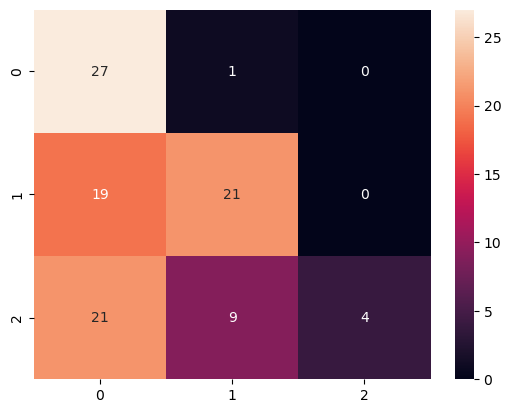

Fold 2 - Accuracy: 0.4019607843137255
Confusion matrix:


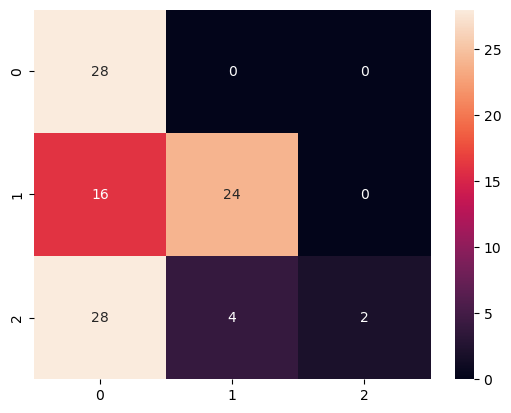

Fold 3 - Accuracy: 0.37254901960784315
Confusion matrix:


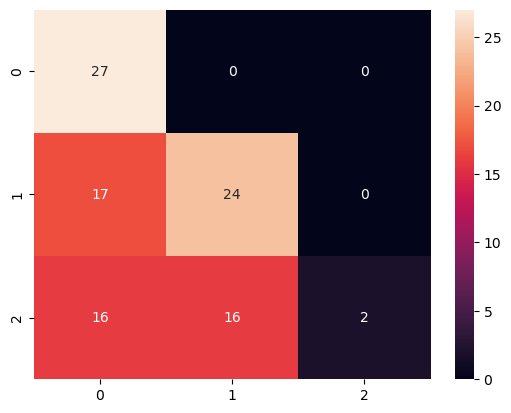

Fold 4 - Accuracy: 0.2647058823529412
Confusion matrix:


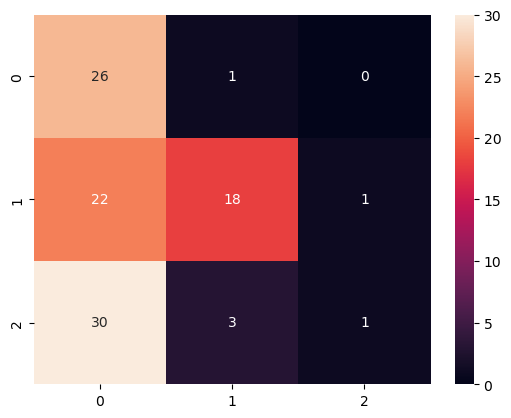

Fold 5 - Accuracy: 0.3465346534653465
Confusion matrix:


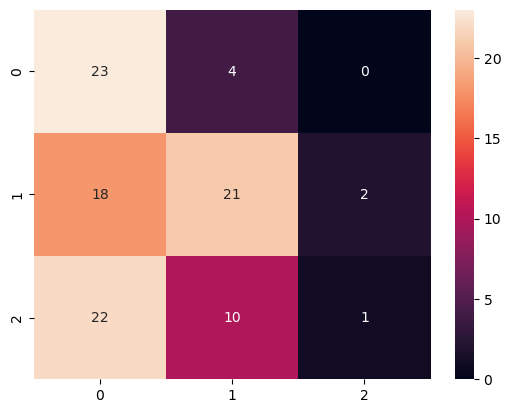

Fold 6 - Accuracy: 0.31683168316831684
Confusion matrix:


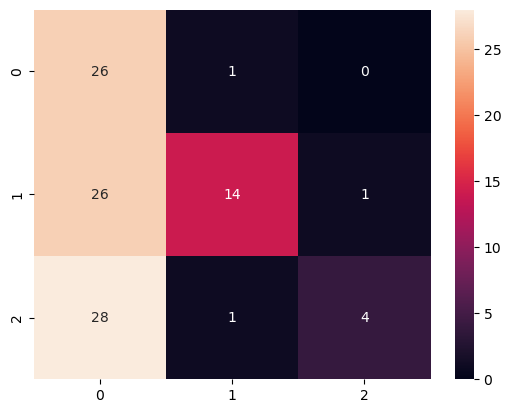

Fold 7 - Accuracy: 0.3069306930693069
Confusion matrix:


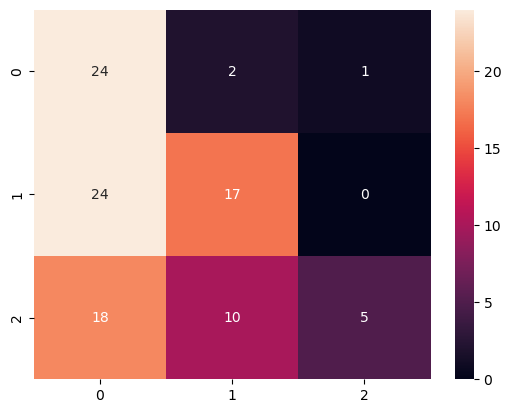

Fold 8 - Accuracy: 0.297029702970297
Confusion matrix:


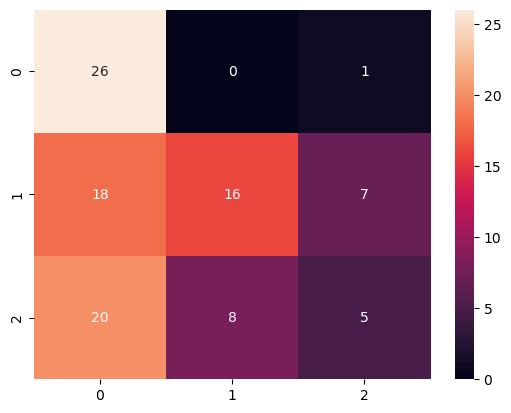

Fold 9 - Accuracy: 0.25742574257425743
Confusion matrix:


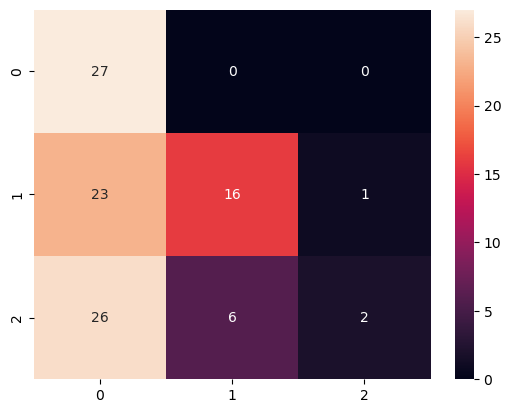

Fold 10 - Accuracy: 0.27722772277227725
Confusion matrix:


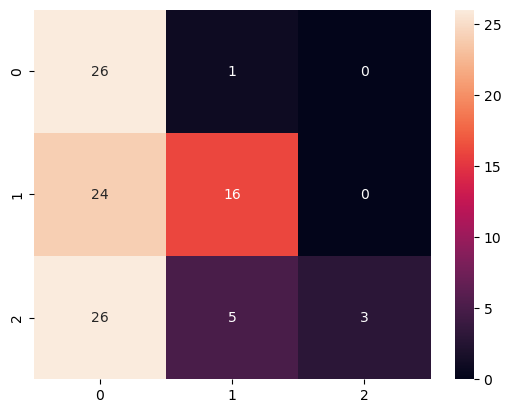

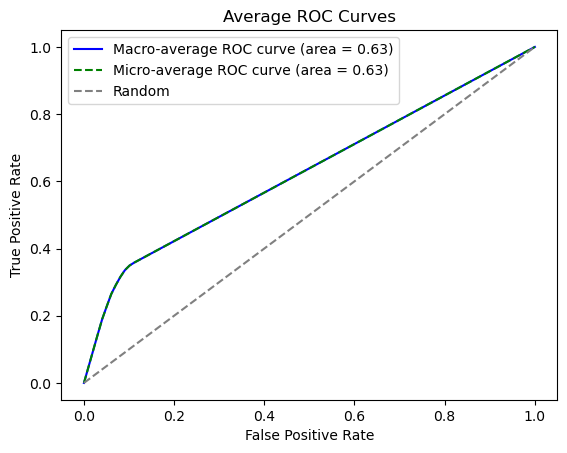

Average Accuracy: 0.32235488254707817
Average Precision: 0.7110070108403783
Average Recall: 0.33331065833576595
Average F1 Score: 0.4179961003689886


In [30]:
# Linear regression
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'RiskLevel' as the target variable
df = pd.read_csv('Dataset.csv')

# Exclude the 'BS' column
X = df.drop(['RiskLevel', 'BS'], axis=1)
y = df['RiskLevel']

skf = StratifiedKFold(n_splits=10)
accuracies = []
precisions = []
recalls = []
f1_scores = []
mean_fpr = np.linspace(0, 1, 100)
macro_tpr_list = []
micro_tpr_list = []

for fold_idx, (train_index, val_index) in enumerate(skf.split(X, y)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    y_train_bin = label_binarize(y_train, classes=np.unique(y))
    y_val_bin = label_binarize(y_val, classes=np.unique(y))

    linreg = OneVsRestClassifier(LinearRegression())
    linreg.fit(X_train, y_train_bin)
    y_val_pred_bin = linreg.predict(X_val)

    # Applying a threshold to convert predicted values into binary predictions
    threshold = 0.5  # Adjust the threshold as needed
    y_val_pred_bin = (y_val_pred_bin > threshold).astype(int)

    # Calculating metrics and appending them to the respective lists
    accuracy = accuracy_score(y_val_bin, y_val_pred_bin)
    precision = precision_score(y_val_bin, y_val_pred_bin, average='macro')
    recall = recall_score(y_val_bin, y_val_pred_bin, average='macro')
    f1 = f1_score(y_val_bin, y_val_pred_bin, average='macro')

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # Confusion matrix
    print(f"Fold {fold_idx + 1} - Accuracy: {accuracy}")
    print("Confusion matrix:")
    cm = confusion_matrix(y_val_bin.argmax(axis=1), y_val_pred_bin.argmax(axis=1))
    sns.heatmap(cm, annot=True)
    plt.show()

    # Calculate ROC curve for each fold using OneVsRest approach
    fpr, tpr, _ = roc_curve(label_binarize(y_val.ravel(), classes=np.unique(y)).ravel(),
                            y_val_pred_bin.ravel())
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    macro_tpr_list.append(interp_tpr)

    micro_fpr, micro_tpr, _ = roc_curve(y_val_bin.ravel(), y_val_pred_bin.ravel())
    micro_tpr_list.append(np.interp(mean_fpr, micro_fpr, micro_tpr))

# Calculate and print average metrics
avg_accuracy = sum(accuracies) / len(accuracies)
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1 = sum(f1_scores) / len(f1_scores)

# Plot average ROC curves
mean_macro_tpr = np.mean(macro_tpr_list, axis=0)
mean_micro_tpr = np.mean(micro_tpr_list, axis=0)

macro_roc_auc = auc(mean_fpr, mean_macro_tpr)
micro_roc_auc = auc(mean_fpr, mean_micro_tpr)

plt.figure()
plt.plot(mean_fpr, mean_macro_tpr, color='b', linestyle='-', label=f'Macro-average ROC curve (area = {macro_roc_auc:.2f})')
plt.plot(mean_fpr, mean_micro_tpr, color='g', linestyle='--', label=f'Micro-average ROC curve (area = {micro_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Average ROC Curves')
plt.legend()
plt.show()

print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1 Score:", avg_f1)


Fold 1 - Accuracy: 0.8235294117647058
Confusion matrix:


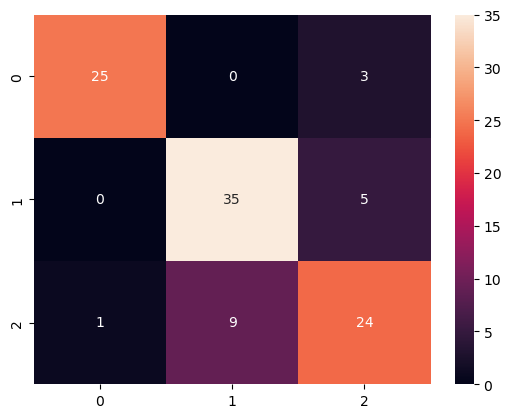

Fold 2 - Accuracy: 0.8235294117647058
Confusion matrix:


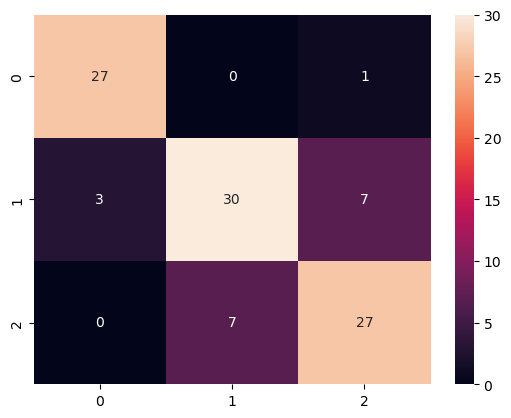

Fold 3 - Accuracy: 0.7352941176470589
Confusion matrix:


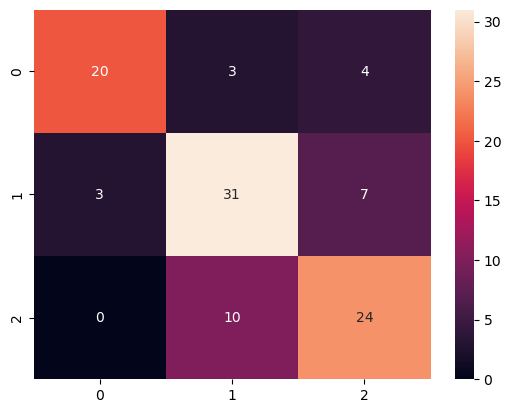

Fold 4 - Accuracy: 0.696078431372549
Confusion matrix:


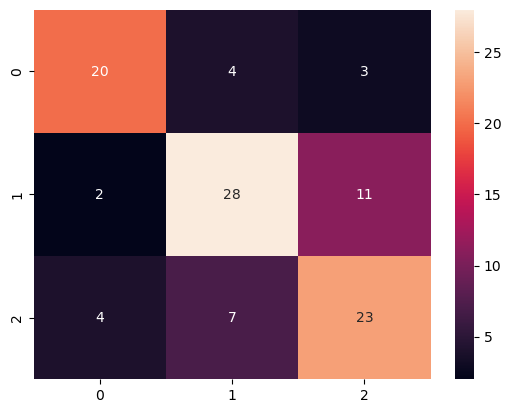

Fold 5 - Accuracy: 0.6831683168316832
Confusion matrix:


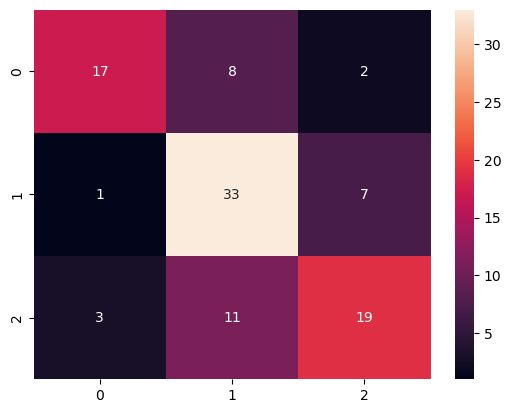

Fold 6 - Accuracy: 0.7722772277227723
Confusion matrix:


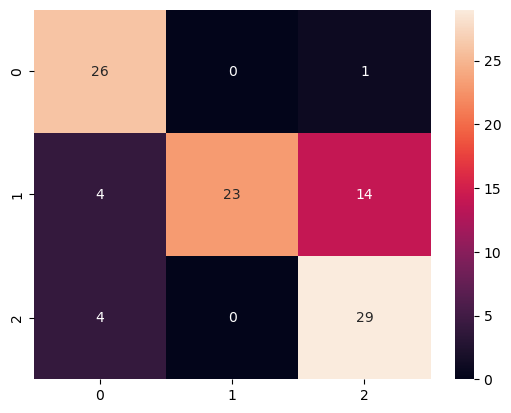

Fold 7 - Accuracy: 0.7722772277227723
Confusion matrix:


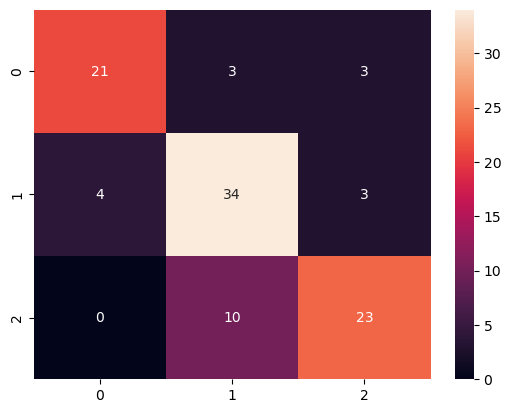

Fold 8 - Accuracy: 0.7326732673267327
Confusion matrix:


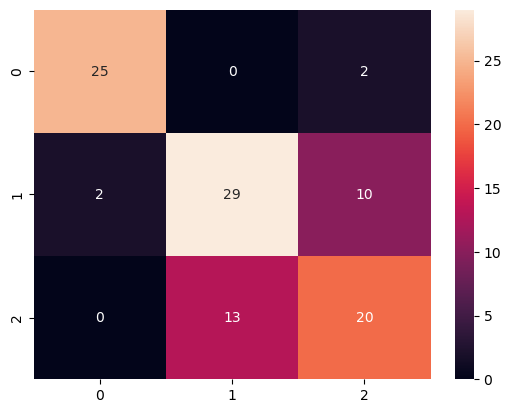

Fold 9 - Accuracy: 0.693069306930693
Confusion matrix:


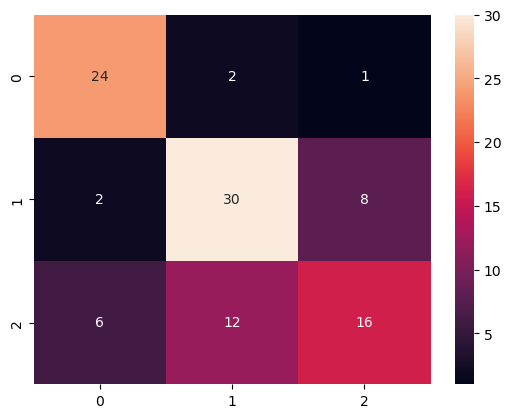

Fold 10 - Accuracy: 0.7623762376237624
Confusion matrix:


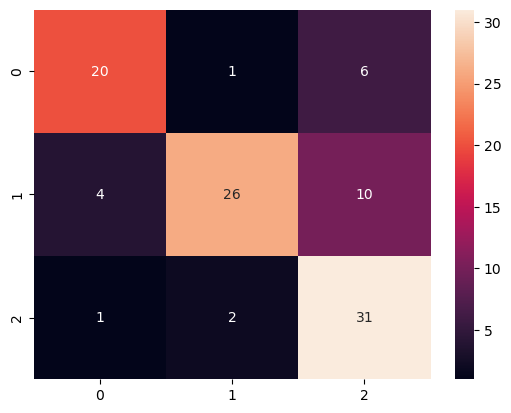

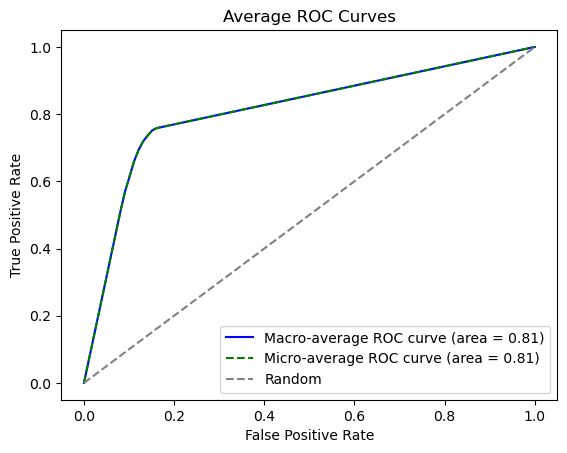

Average Accuracy: 0.7494272956707435
Average Precision: 0.7643406687959121
Average Recall: 0.755109843970437
Average F1 Score: 0.7531148763420082


In [32]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import label_binarize
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

X = df.drop(['RiskLevel', 'BS'], axis=1)
y = df['RiskLevel']

rf = RandomForestClassifier()
skf = StratifiedKFold(n_splits=10)

accuracies = []
precisions = []
recalls = []
f1_scores = []
mean_fpr = np.linspace(0, 1, 100)
macro_tpr_list = []
micro_tpr_list = []

for fold_idx, (train_index, val_index) in enumerate(skf.split(X, y)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]

    rf.fit(X_train, y_train)
    y_val_pred = rf.predict(X_val)

    # Calculating metrics and appending them to the respective lists
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred, average='macro')
    recall = recall_score(y_val, y_val_pred, average='macro')
    f1 = f1_score(y_val, y_val_pred, average='macro')

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # Confusion matrix
    print(f"Fold {fold_idx + 1} - Accuracy: {accuracy}")
    print("Confusion matrix:")
    cm = confusion_matrix(y_val, y_val_pred)
    sns.heatmap(cm, annot=True)
    plt.show()

    # Calculate ROC curve for each fold using OneVsRest approach
    y_val_bin = label_binarize(y_val, classes=np.unique(y))
    y_val_pred_bin = label_binarize(y_val_pred, classes=np.unique(y))

    fpr, tpr, _ = roc_curve(y_val_bin.ravel(), y_val_pred_bin.ravel())
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    macro_tpr_list.append(interp_tpr)

    micro_fpr, micro_tpr, _ = roc_curve(y_val_bin.ravel(), y_val_pred_bin.ravel())
    micro_tpr_list.append(np.interp(mean_fpr, micro_fpr, micro_tpr))

# Calculate and print average metrics
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1_scores)

# Plot average ROC curves
mean_macro_tpr = np.mean(macro_tpr_list, axis=0)
mean_micro_tpr = np.mean(micro_tpr_list, axis=0)

macro_roc_auc = auc(mean_fpr, mean_macro_tpr)
micro_roc_auc = auc(mean_fpr, mean_micro_tpr)

plt.figure()
plt.plot(mean_fpr, mean_macro_tpr, color='b', linestyle='-', label=f'Macro-average ROC curve (area = {macro_roc_auc:.2f})')
plt.plot(mean_fpr, mean_micro_tpr, color='g', linestyle='--', label=f'Micro-average ROC curve (area = {micro_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Average ROC Curves')
plt.legend()
plt.show()

print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1 Score:", avg_f1)


Fold 1 - Accuracy: 0.803921568627451
Confusion matrix:


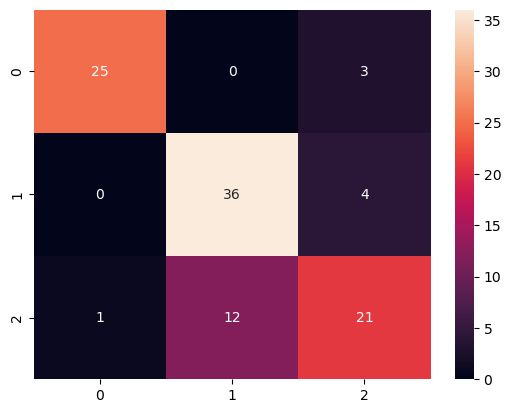

Fold 2 - Accuracy: 0.8627450980392157
Confusion matrix:


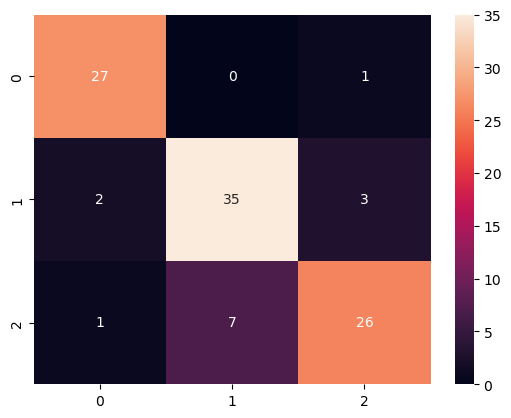

Fold 3 - Accuracy: 0.6470588235294118
Confusion matrix:


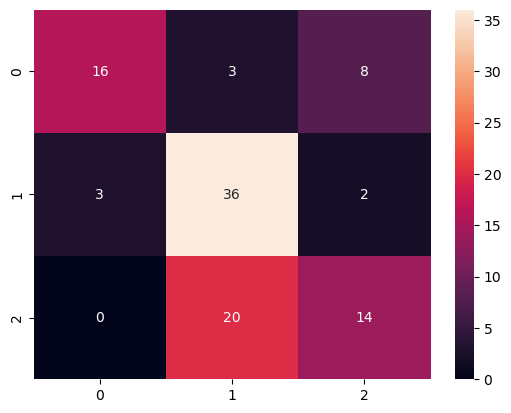

Fold 4 - Accuracy: 0.6274509803921569
Confusion matrix:


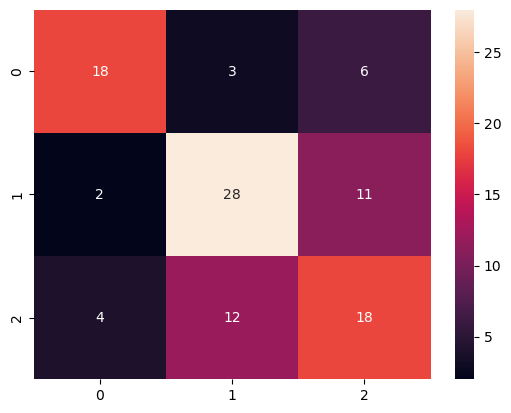

Fold 5 - Accuracy: 0.7128712871287128
Confusion matrix:


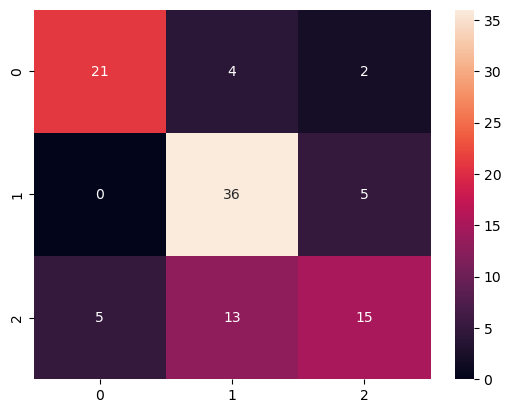

Fold 6 - Accuracy: 0.7524752475247525
Confusion matrix:


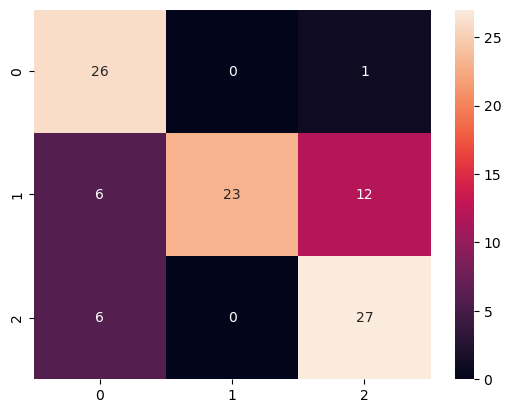

Fold 7 - Accuracy: 0.7425742574257426
Confusion matrix:


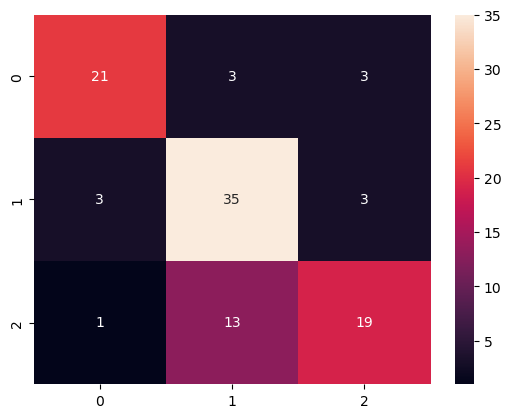

Fold 8 - Accuracy: 0.7425742574257426
Confusion matrix:


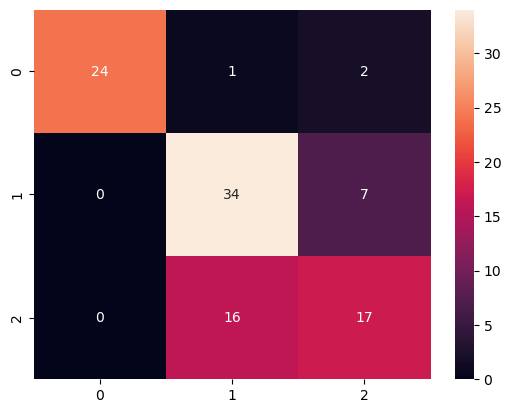

Fold 9 - Accuracy: 0.6237623762376238
Confusion matrix:


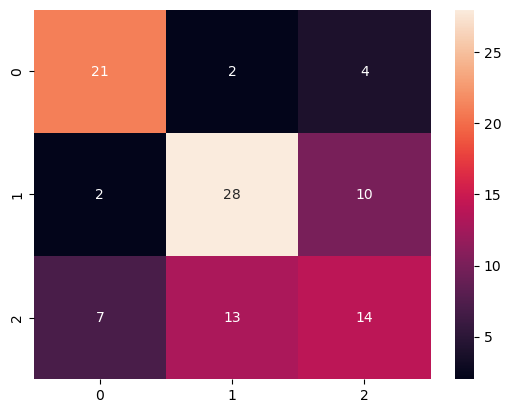

Fold 10 - Accuracy: 0.7128712871287128
Confusion matrix:


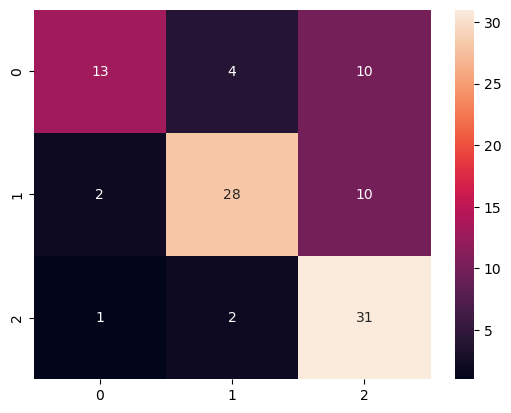

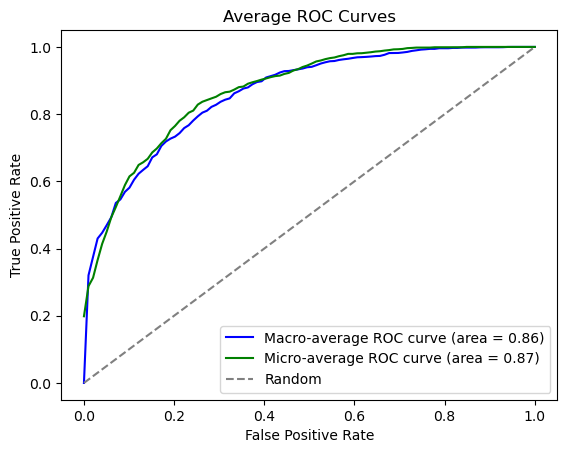

Average Accuracy: 0.7228305183459522
Average Precision: 0.7414128007805891
Average Recall: 0.7217230266500949
Average F1 Score: 0.7202681926407368


In [40]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import StratifiedKFold
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

X = df.drop(['RiskLevel', 'BS'], axis=1)
y = df['RiskLevel']
gb = GradientBoostingClassifier()
skf = StratifiedKFold(n_splits=10)

accuracies = []
precisions = []
recalls = []
f1_scores = []
mean_fpr = np.linspace(0, 1, 100)
macro_tpr_list = []
micro_tpr_list = []

for fold_idx, (train_index, val_index) in enumerate(skf.split(X, y)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]
    gb.fit(X_train, y_train)
    y_val_pred = gb.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(accuracy)
    print(f"Fold {fold_idx + 1} - Accuracy: {accuracy}")

    # Confusion matrix
    print("Confusion matrix:")
    cm = confusion_matrix(y_val, y_val_pred)
    sns.heatmap(cm, annot=True)
    plt.show()

    # Precision, Recall, F1 Score
    precision = precision_score(y_val, y_val_pred, average='macro')
    recall = recall_score(y_val, y_val_pred, average='macro')
    f1 = f1_score(y_val, y_val_pred, average='macro')
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # ROC curves
    macro_tpr_fold_list = []
    for i in range(len(np.unique(y))):
        fpr, tpr, _ = roc_curve(label_binarize(y_val, classes=np.unique(y))[:, i], gb.decision_function(X_val)[:, i])
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        macro_tpr_fold_list.append(interp_tpr)

    micro_fpr, micro_tpr, _ = roc_curve(label_binarize(y_val, classes=np.unique(y)).ravel(), gb.decision_function(X_val).ravel())
    macro_tpr_list.extend(macro_tpr_fold_list)
    micro_tpr_list.append(np.interp(mean_fpr, micro_fpr, micro_tpr))

# Plot average ROC curves
mean_macro_tpr = np.mean(macro_tpr_list, axis=0)
mean_micro_tpr = np.mean(micro_tpr_list, axis=0)

macro_roc_auc = auc(mean_fpr, mean_macro_tpr)
micro_roc_auc = auc(mean_fpr, mean_micro_tpr)

plt.figure()
plt.plot(mean_fpr, mean_macro_tpr, color='b', label=f'Macro-average ROC curve (area = {macro_roc_auc:.2f})')
plt.plot(mean_fpr, mean_micro_tpr, color='g', label=f'Micro-average ROC curve (area = {micro_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Average ROC Curves')
plt.legend()
plt.show()

# Display average metrics
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1_scores)

print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1 Score:", avg_f1)


Fold 1 - Accuracy: 0.6274509803921569
Confusion matrix:


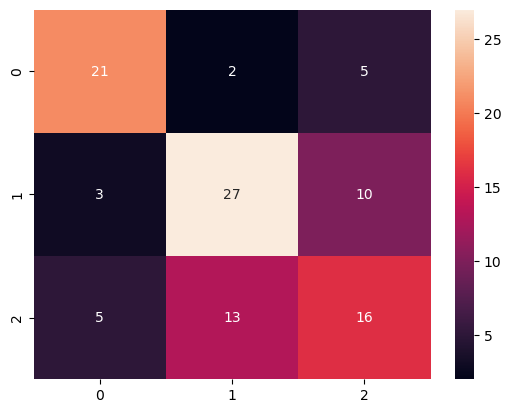

Fold 2 - Accuracy: 0.6666666666666666
Confusion matrix:


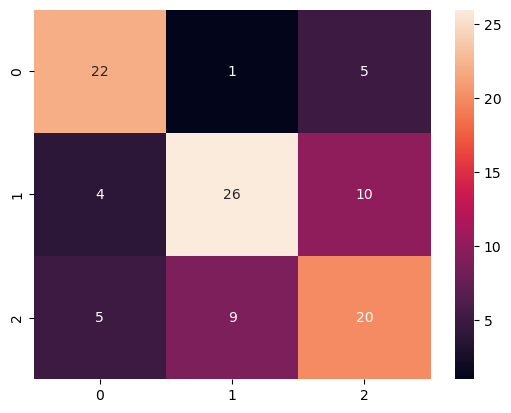

Fold 3 - Accuracy: 0.5392156862745098
Confusion matrix:


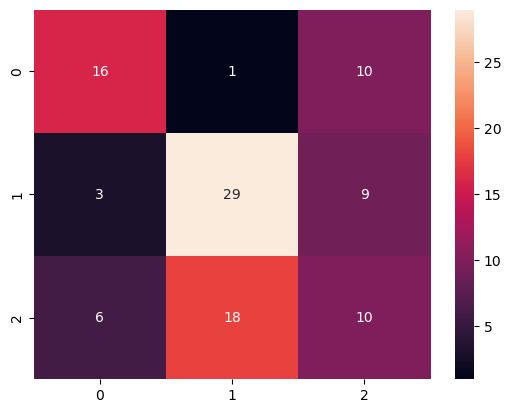

Fold 4 - Accuracy: 0.5196078431372549
Confusion matrix:


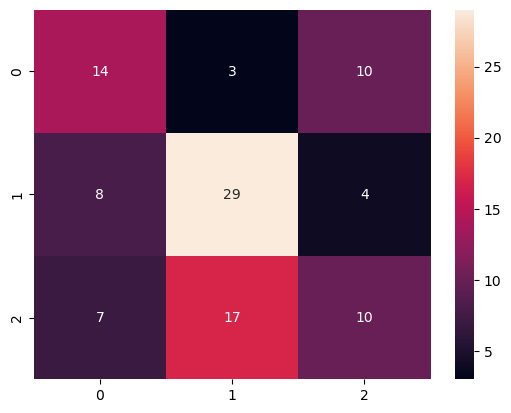

Fold 5 - Accuracy: 0.5742574257425742
Confusion matrix:


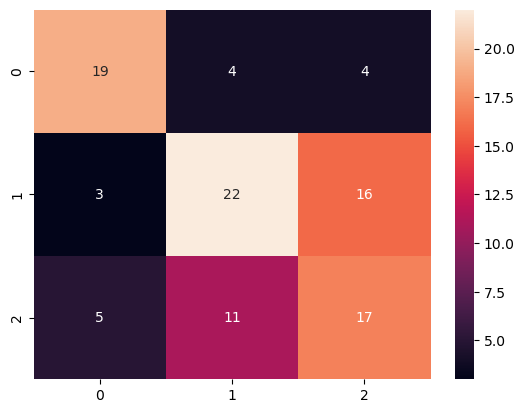

Fold 6 - Accuracy: 0.6633663366336634
Confusion matrix:


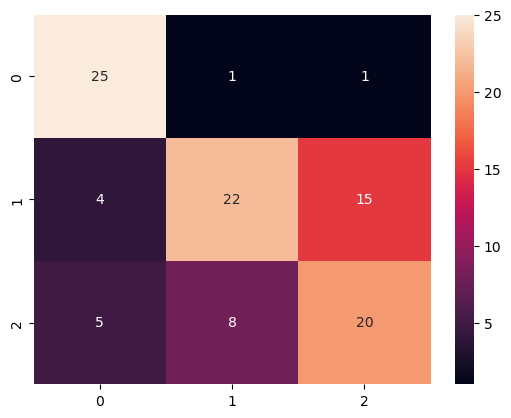

Fold 7 - Accuracy: 0.5346534653465347
Confusion matrix:


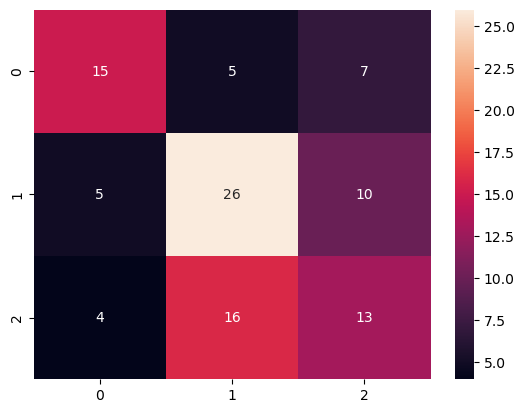

Fold 8 - Accuracy: 0.6039603960396039
Confusion matrix:


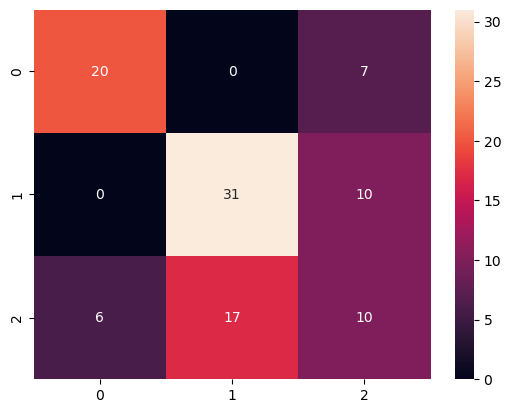

Fold 9 - Accuracy: 0.5742574257425742
Confusion matrix:


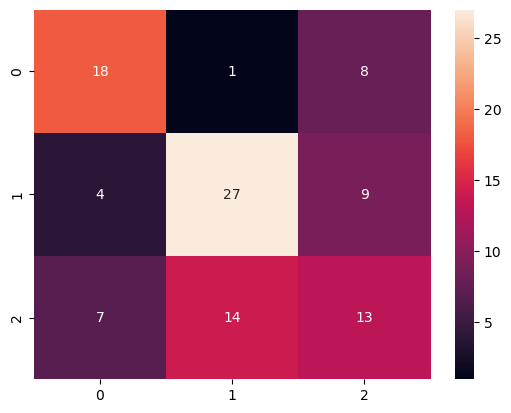

Fold 10 - Accuracy: 0.5346534653465347
Confusion matrix:


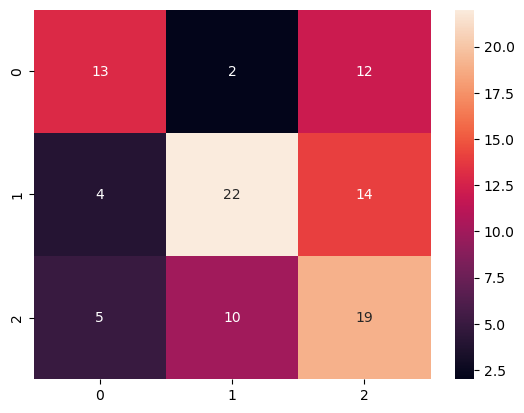

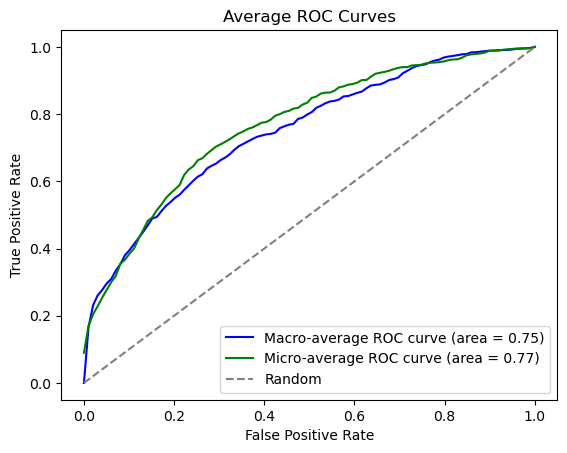

Average Accuracy: 0.5838089691322074
Average Precision: 0.5826341002682472
Average Recall: 0.5851788454562248
Average F1 Score: 0.580852387170766


In [41]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import StratifiedKFold
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

X = df.drop(['RiskLevel', 'BS'], axis=1)
y = df['RiskLevel']
nb = GaussianNB()
skf = StratifiedKFold(n_splits=10)

accuracies = []
precisions = []
recalls = []
f1_scores = []
mean_fpr = np.linspace(0, 1, 100)
macro_tpr_list = []
micro_tpr_list = []

for fold_idx, (train_index, val_index) in enumerate(skf.split(X, y)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]
    nb.fit(X_train, y_train)
    y_val_pred = nb.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(accuracy)
    print(f"Fold {fold_idx + 1} - Accuracy: {accuracy}")

    # Confusion matrix
    print("Confusion matrix:")
    cm = confusion_matrix(y_val, y_val_pred)
    sns.heatmap(cm, annot=True)
    plt.show()

    # Precision, Recall, F1 Score
    precision = precision_score(y_val, y_val_pred, average='macro')
    recall = recall_score(y_val, y_val_pred, average='macro')
    f1 = f1_score(y_val, y_val_pred, average='macro')
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # ROC curves
    macro_tpr_fold_list = []
    for i in range(len(np.unique(y))):
        fpr, tpr, _ = roc_curve(label_binarize(y_val, classes=np.unique(y))[:, i], nb.predict_proba(X_val)[:, i])
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        macro_tpr_fold_list.append(interp_tpr)

    micro_fpr, micro_tpr, _ = roc_curve(label_binarize(y_val, classes=np.unique(y)).ravel(), nb.predict_proba(X_val).ravel())
    macro_tpr_list.extend(macro_tpr_fold_list)
    micro_tpr_list.append(np.interp(mean_fpr, micro_fpr, micro_tpr))

# Plot average ROC curves
mean_macro_tpr = np.mean(macro_tpr_list, axis=0)
mean_micro_tpr = np.mean(micro_tpr_list, axis=0)

macro_roc_auc = auc(mean_fpr, mean_macro_tpr)
micro_roc_auc = auc(mean_fpr, mean_micro_tpr)

plt.figure()
plt.plot(mean_fpr, mean_macro_tpr, color='b', label=f'Macro-average ROC curve (area = {macro_roc_auc:.2f})')
plt.plot(mean_fpr, mean_micro_tpr, color='g', label=f'Micro-average ROC curve (area = {micro_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Average ROC Curves')
plt.legend()
plt.show()

# Display average metrics
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1_scores)

print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1 Score:", avg_f1)


Fold 1 - Accuracy: 0.7745098039215687
Confusion matrix:


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


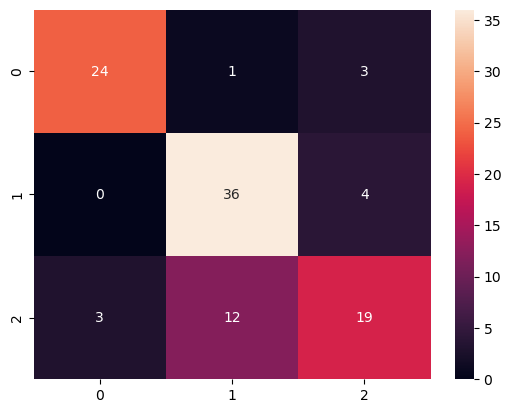

Fold 2 - Accuracy: 0.7843137254901961
Confusion matrix:


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


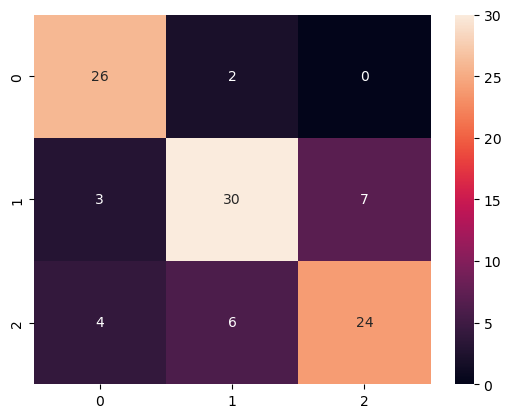

Fold 3 - Accuracy: 0.6666666666666666
Confusion matrix:


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


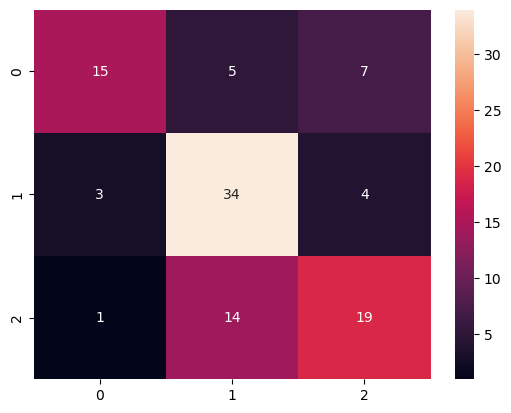

Fold 4 - Accuracy: 0.6176470588235294
Confusion matrix:


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


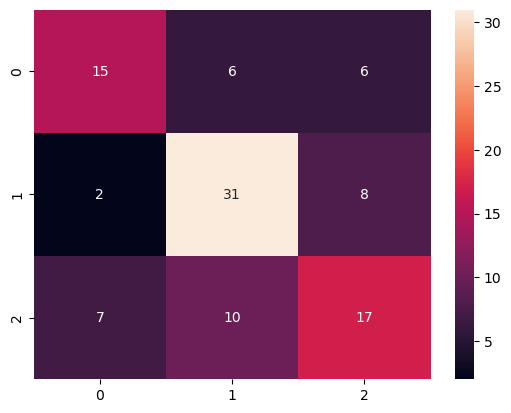

Fold 5 - Accuracy: 0.6435643564356436
Confusion matrix:


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


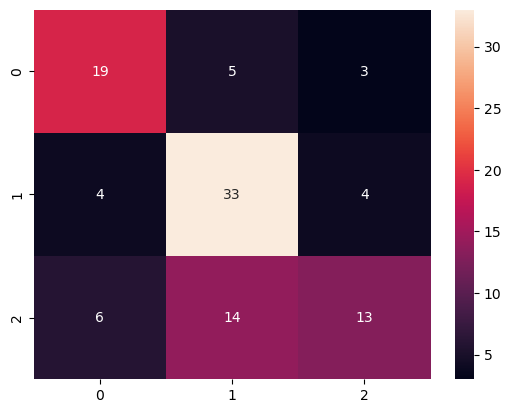

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Fold 6 - Accuracy: 0.693069306930693
Confusion matrix:


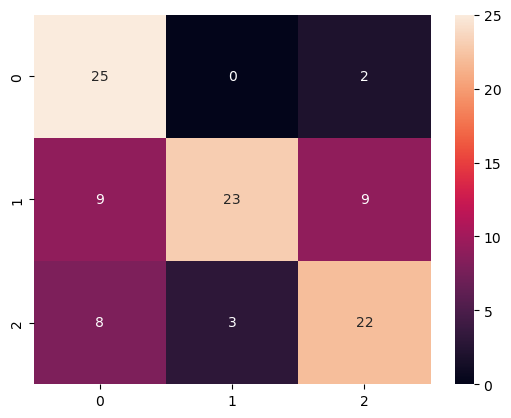

Fold 7 - Accuracy: 0.7029702970297029
Confusion matrix:


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


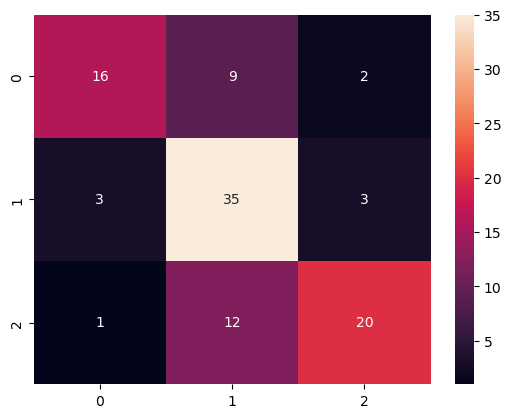

Fold 8 - Accuracy: 0.6138613861386139
Confusion matrix:


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


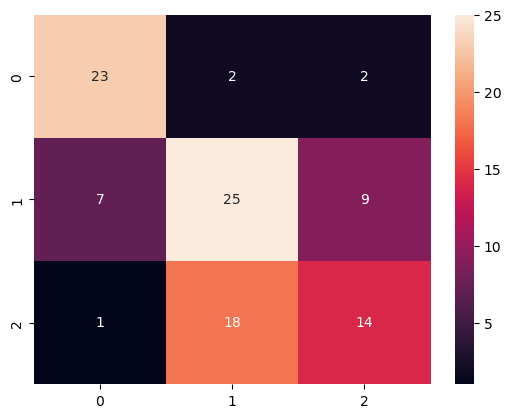

Fold 9 - Accuracy: 0.6237623762376238
Confusion matrix:


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


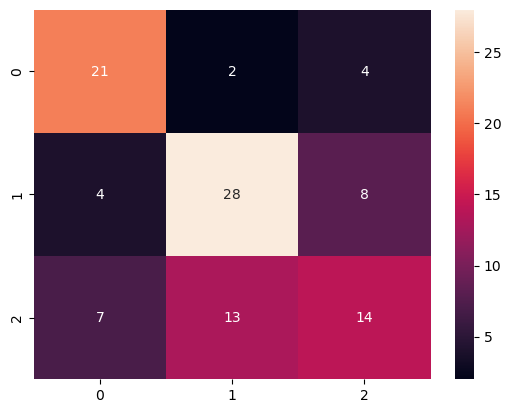

Fold 10 - Accuracy: 0.6732673267326733
Confusion matrix:


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


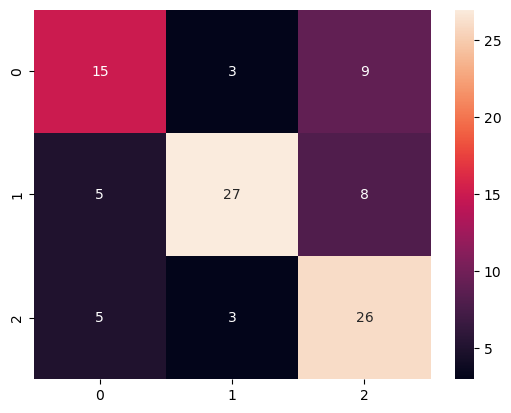

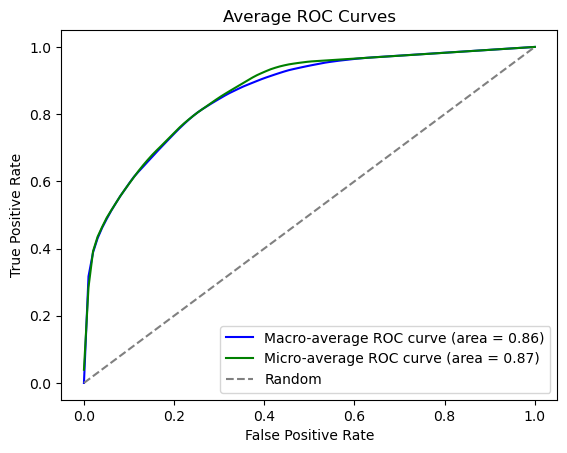

Average Accuracy: 0.679363230440691
Average Precision: 0.6880227442845953
Average Recall: 0.6778258680494453
Average F1 Score: 0.6737229906271904


In [43]:
# k-Nearest Neighbors (k-NN)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

X = df.drop(['RiskLevel', 'BS'], axis=1)
y = df['RiskLevel']
knn = KNeighborsClassifier(n_neighbors=5)
skf = StratifiedKFold(n_splits=10)

accuracies = []
precisions = []
recalls = []
f1_scores = []
mean_fpr = np.linspace(0, 1, 100)
macro_tpr_list = []
micro_tpr_list = []

for fold_idx, (train_index, val_index) in enumerate(skf.split(X, y)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]
    knn.fit(X_train, y_train)
    y_val_pred = knn.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(accuracy)
    print(f"Fold {fold_idx + 1} - Accuracy: {accuracy}")

    # Confusion matrix
    print("Confusion matrix:")
    cm = confusion_matrix(y_val, y_val_pred)
    sns.heatmap(cm, annot=True)
    plt.show()

    # ROC curves
    macro_tpr_fold_list = []
    for i in range(len(np.unique(y))):
        fpr, tpr, _ = roc_curve(label_binarize(y_val, classes=np.unique(y))[:, i], knn.predict_proba(X_val)[:, i])
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        macro_tpr_fold_list.append(interp_tpr)

    micro_fpr, micro_tpr, _ = roc_curve(label_binarize(y_val, classes=np.unique(y)).ravel(), knn.predict_proba(X_val).ravel())
    macro_tpr_list.extend(macro_tpr_fold_list)
    micro_tpr_list.append(np.interp(mean_fpr, micro_fpr, micro_tpr))

    # Precision, Recall, and F1 Score
    precision = precision_score(y_val, y_val_pred, average='macro')
    recall = recall_score(y_val, y_val_pred, average='macro')
    f1 = f1_score(y_val, y_val_pred, average='macro')

    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Plot average ROC curves
mean_macro_tpr = np.mean(macro_tpr_list, axis=0)
mean_micro_tpr = np.mean(micro_tpr_list, axis=0)

macro_roc_auc = auc(mean_fpr, mean_macro_tpr)
micro_roc_auc = auc(mean_fpr, mean_micro_tpr)

plt.figure()
plt.plot(mean_fpr, mean_macro_tpr, color='b', label=f'Macro-average ROC curve (area = {macro_roc_auc:.2f})')
plt.plot(mean_fpr, mean_micro_tpr, color='g', label=f'Micro-average ROC curve (area = {micro_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Average ROC Curves')
plt.legend()
plt.show()

# Display average metrics
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1_scores)

print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1 Score:", avg_f1)


Fold 1 - Accuracy: 0.8137254901960784
Confusion matrix:


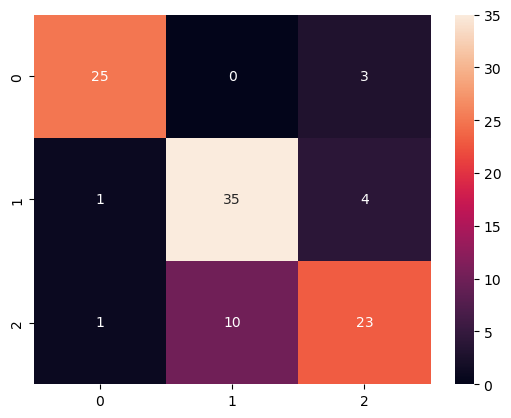

Fold 2 - Accuracy: 0.803921568627451
Confusion matrix:


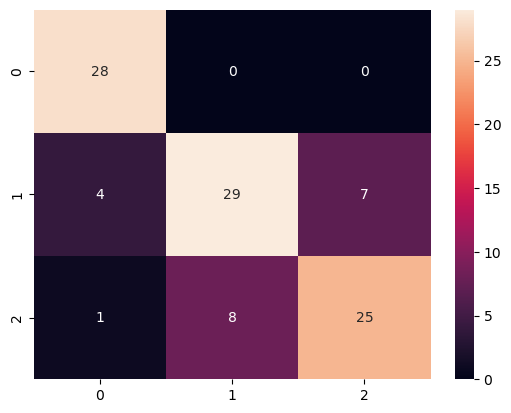

Fold 3 - Accuracy: 0.7156862745098039
Confusion matrix:


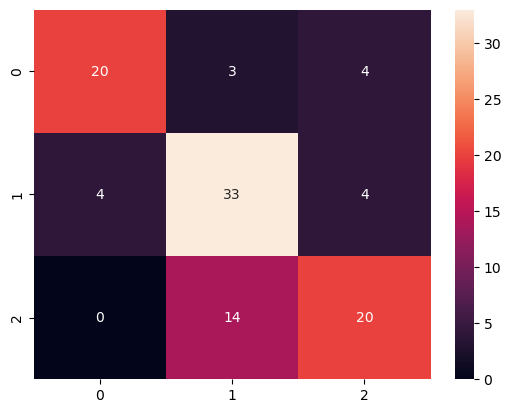

Fold 4 - Accuracy: 0.696078431372549
Confusion matrix:


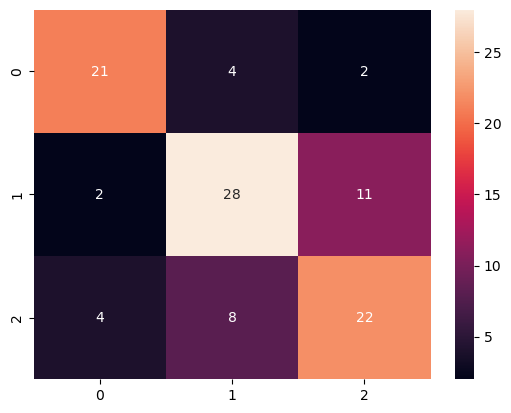

Fold 5 - Accuracy: 0.7029702970297029
Confusion matrix:


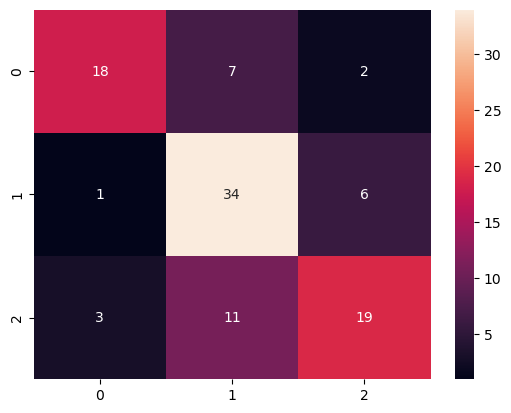

Fold 6 - Accuracy: 0.7227722772277227
Confusion matrix:


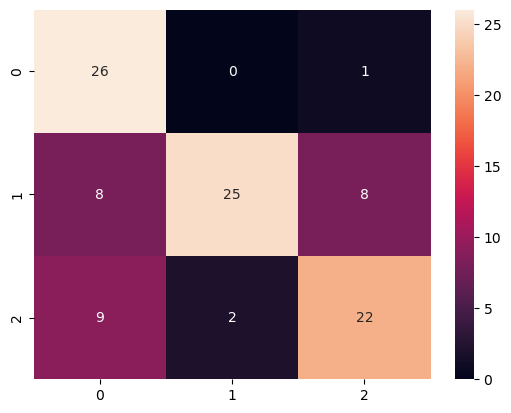

Fold 7 - Accuracy: 0.7623762376237624
Confusion matrix:


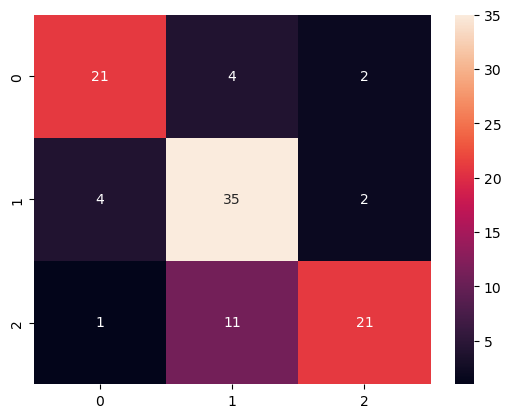

Fold 8 - Accuracy: 0.7029702970297029
Confusion matrix:


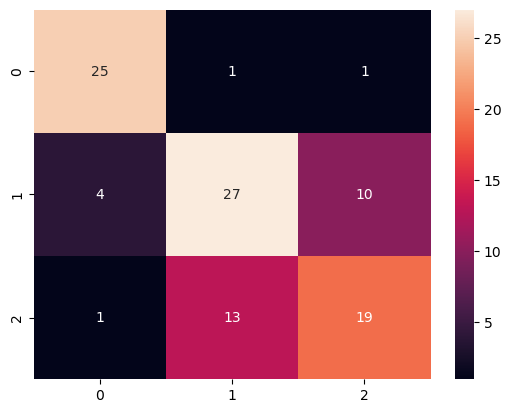

Fold 9 - Accuracy: 0.7029702970297029
Confusion matrix:


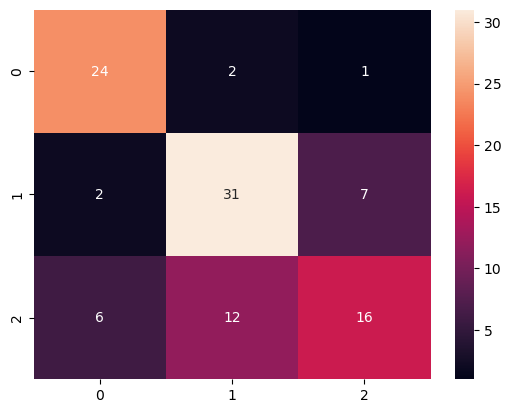

Fold 10 - Accuracy: 0.7821782178217822
Confusion matrix:


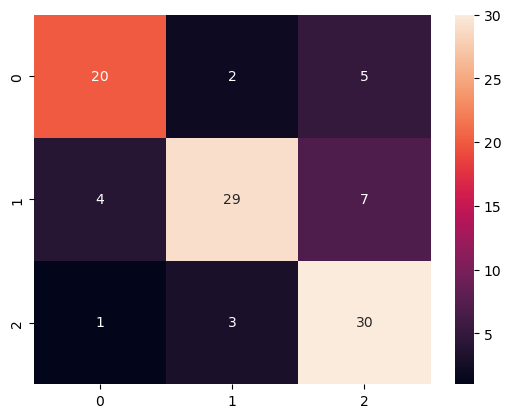

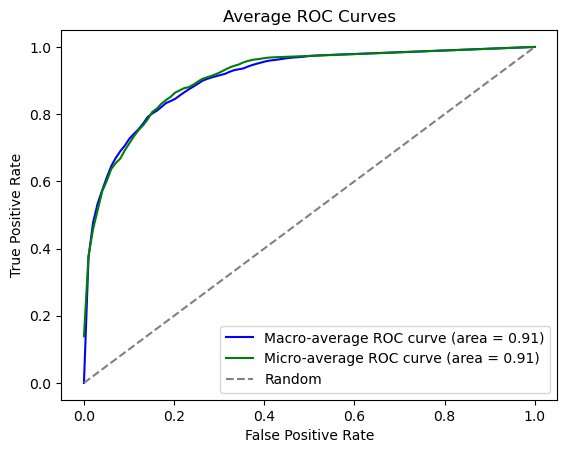

Average Accuracy: 0.7405649388468258
Average Precision: 0.7519840482149027
Average Recall: 0.7455969489709328
Average F1 Score: 0.7422854250658066


In [49]:
# Decision Trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

X = df.drop(['RiskLevel', 'BS'], axis=1)
y = df['RiskLevel']
dt = DecisionTreeClassifier()
skf = StratifiedKFold(n_splits=10)

accuracies = []
precisions = []
recalls = []
f1_scores = []
mean_fpr = np.linspace(0, 1, 100)
macro_tpr_list = []
micro_tpr_list = []

for fold_idx, (train_index, val_index) in enumerate(skf.split(X, y)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]
    dt.fit(X_train, y_train)
    y_val_pred = dt.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(accuracy)
    print(f"Fold {fold_idx + 1} - Accuracy: {accuracy}")

    # Confusion matrix
    print("Confusion matrix:")
    cm = confusion_matrix(y_val, y_val_pred)
    sns.heatmap(cm, annot=True)
    plt.show()

    # ROC curves
    macro_tpr_fold_list = []
    for i in range(len(np.unique(y))):
        fpr, tpr, _ = roc_curve(label_binarize(y_val, classes=np.unique(y))[:, i], dt.predict_proba(X_val)[:, i])
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        macro_tpr_fold_list.append(interp_tpr)

    micro_fpr, micro_tpr, _ = roc_curve(label_binarize(y_val, classes=np.unique(y)).ravel(), dt.predict_proba(X_val).ravel())
    macro_tpr_list.extend(macro_tpr_fold_list)
    micro_tpr_list.append(np.interp(mean_fpr, micro_fpr, micro_tpr))

    # Precision, Recall, and F1 Score
    precision = precision_score(y_val, y_val_pred, average='macro')
    recall = recall_score(y_val, y_val_pred, average='macro')
    f1 = f1_score(y_val, y_val_pred, average='macro')

    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Plot average ROC curves
mean_macro_tpr = np.mean(macro_tpr_list, axis=0)
mean_micro_tpr = np.mean(micro_tpr_list, axis=0)

macro_roc_auc = auc(mean_fpr, mean_macro_tpr)
micro_roc_auc = auc(mean_fpr, mean_micro_tpr)

plt.figure()
plt.plot(mean_fpr, mean_macro_tpr, color='b', label=f'Macro-average ROC curve (area = {macro_roc_auc:.2f})')
plt.plot(mean_fpr, mean_micro_tpr, color='g', label=f'Micro-average ROC curve (area = {micro_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Average ROC Curves')
plt.legend()
plt.show()

# Display average metrics
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1_scores)

print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1 Score:", avg_f1)


Fold 1 - Accuracy: 0.8235294117647058
Confusion matrix:


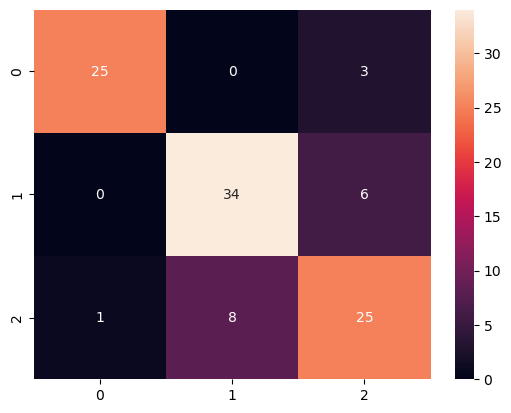

Fold 2 - Accuracy: 0.8333333333333334
Confusion matrix:


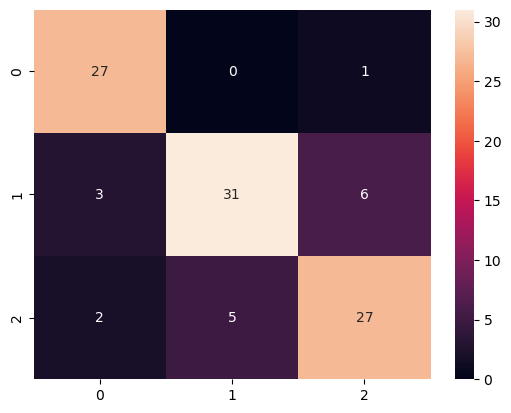

Fold 3 - Accuracy: 0.696078431372549
Confusion matrix:


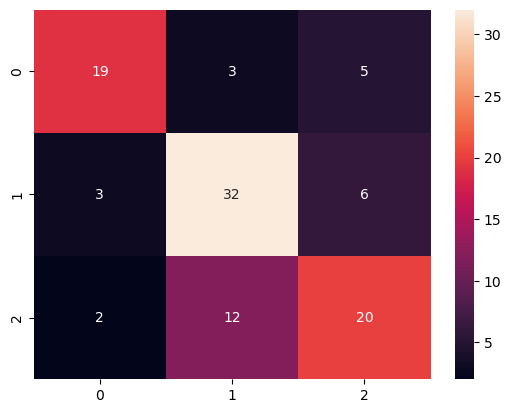

Fold 4 - Accuracy: 0.7058823529411765
Confusion matrix:


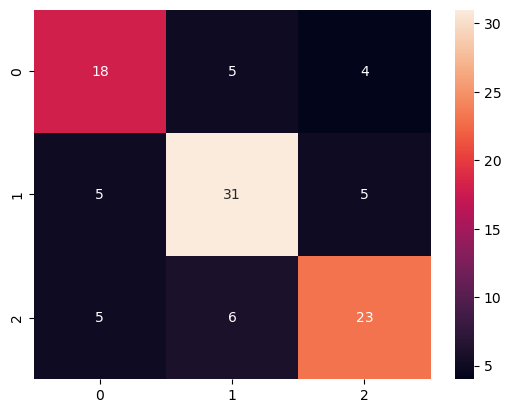

Fold 5 - Accuracy: 0.7425742574257426
Confusion matrix:


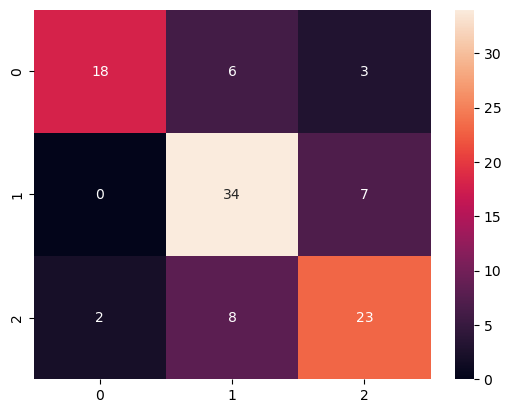

Fold 6 - Accuracy: 0.7425742574257426
Confusion matrix:


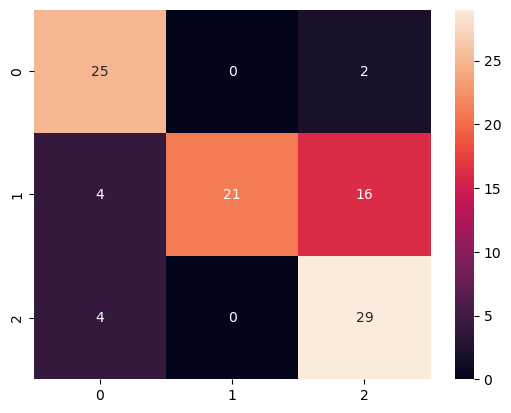

Fold 7 - Accuracy: 0.7821782178217822
Confusion matrix:


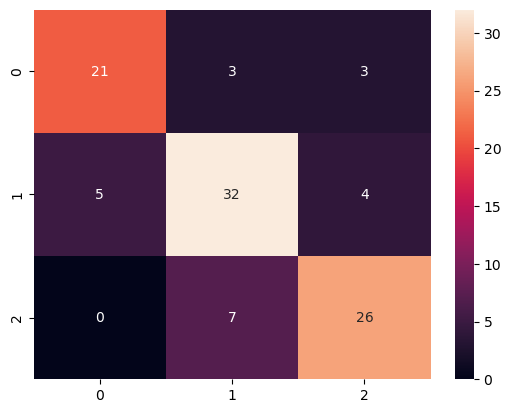

Fold 8 - Accuracy: 0.7227722772277227
Confusion matrix:


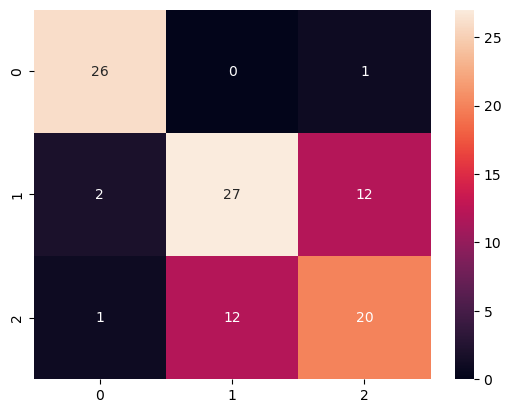

Fold 9 - Accuracy: 0.693069306930693
Confusion matrix:


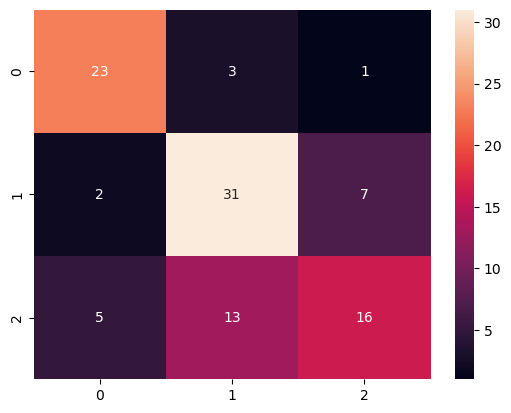

Fold 10 - Accuracy: 0.7821782178217822
Confusion matrix:


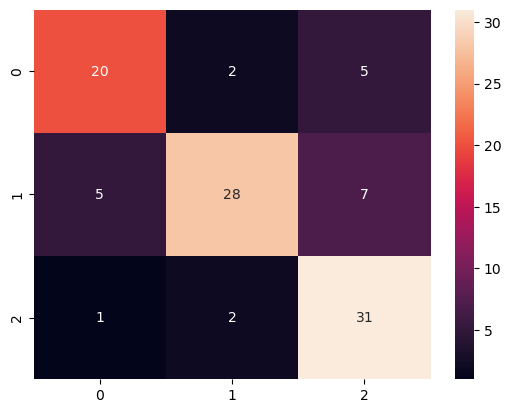

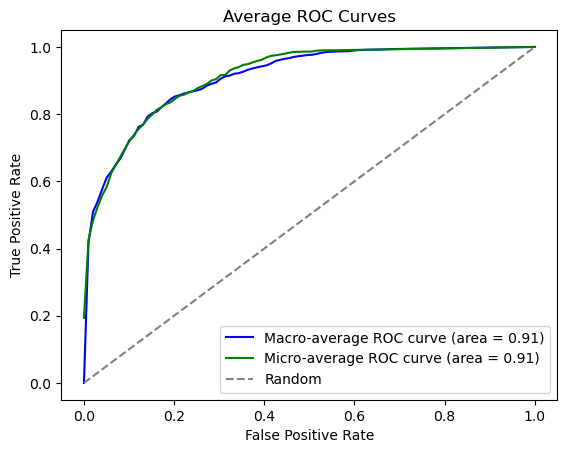

Average Accuracy: 0.752417006406523
Average Precision: 0.7637693765438216
Average Recall: 0.7572226627367709
Average F1 Score: 0.7539833877356664


In [45]:
# Bagging using Decision Tree Classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

X = df.drop(['RiskLevel', 'BS'], axis=1)
y = df['RiskLevel']
base_classifier = DecisionTreeClassifier()
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10)
skf = StratifiedKFold(n_splits=10)

accuracies = []
precisions = []
recalls = []
f1_scores = []
mean_fpr = np.linspace(0, 1, 100)
macro_tpr_list = []
micro_tpr_list = []

for fold_idx, (train_index, val_index) in enumerate(skf.split(X, y)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    # Fit the bagging classifier
    bagging_classifier.fit(X_train, y_train)
    
    # Predictions
    y_val_pred = bagging_classifier.predict(X_val)
    
    # Accuracy
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(accuracy)
    print(f"Fold {fold_idx + 1} - Accuracy: {accuracy}")

    # Confusion matrix
    print("Confusion matrix:")
    cm = confusion_matrix(y_val, y_val_pred)
    sns.heatmap(cm, annot=True)
    plt.show()

    # ROC curves
    macro_tpr_fold_list = []
    for i in range(len(np.unique(y))):
        fpr, tpr, _ = roc_curve(label_binarize(y_val, classes=np.unique(y))[:, i], bagging_classifier.predict_proba(X_val)[:, i])
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        macro_tpr_fold_list.append(interp_tpr)

    micro_fpr, micro_tpr, _ = roc_curve(label_binarize(y_val, classes=np.unique(y)).ravel(), bagging_classifier.predict_proba(X_val).ravel())
    macro_tpr_list.extend(macro_tpr_fold_list)
    micro_tpr_list.append(np.interp(mean_fpr, micro_fpr, micro_tpr))

    # Precision, Recall, and F1 Score
    precision = precision_score(y_val, y_val_pred, average='macro')
    recall = recall_score(y_val, y_val_pred, average='macro')
    f1 = f1_score(y_val, y_val_pred, average='macro')

    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Plot average ROC curves
mean_macro_tpr = np.mean(macro_tpr_list, axis=0)
mean_micro_tpr = np.mean(micro_tpr_list, axis=0)

macro_roc_auc = auc(mean_fpr, mean_macro_tpr)
micro_roc_auc = auc(mean_fpr, mean_micro_tpr)

plt.figure()
plt.plot(mean_fpr, mean_macro_tpr, color='b', label=f'Macro-average ROC curve (area = {macro_roc_auc:.2f})')
plt.plot(mean_fpr, mean_micro_tpr, color='g', label=f'Micro-average ROC curve (area = {micro_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Average ROC Curves')
plt.legend()
plt.show()

# Display average metrics
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1_scores)

print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1 Score:", avg_f1)


Fold 1 - Accuracy: 0.8235294117647058
Confusion matrix:


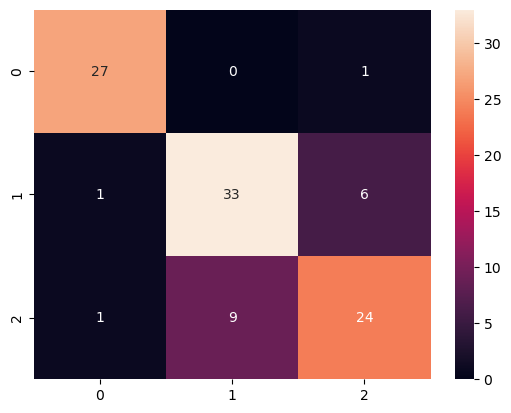

Fold 2 - Accuracy: 0.8627450980392157
Confusion matrix:


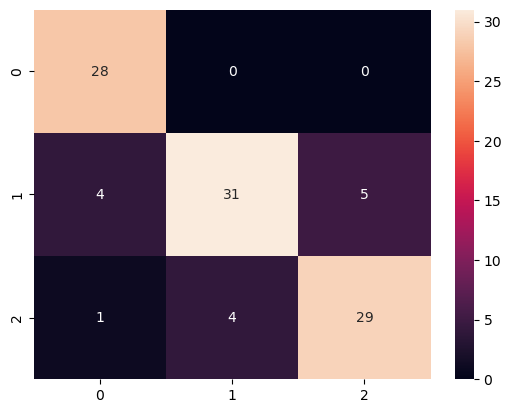

Fold 3 - Accuracy: 0.7352941176470589
Confusion matrix:


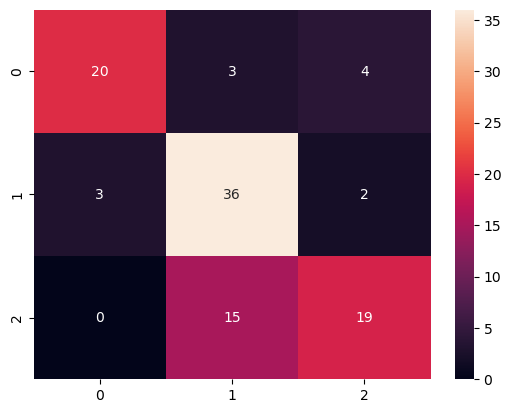

Fold 4 - Accuracy: 0.6274509803921569
Confusion matrix:


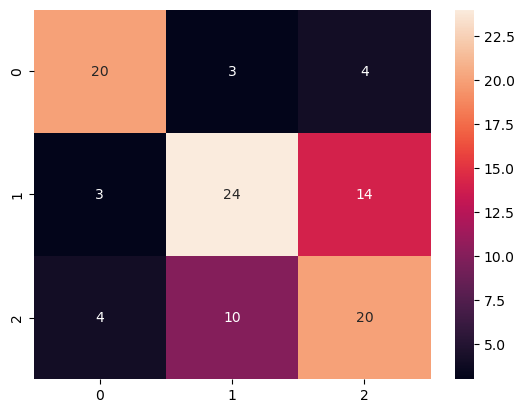

Fold 5 - Accuracy: 0.7326732673267327
Confusion matrix:


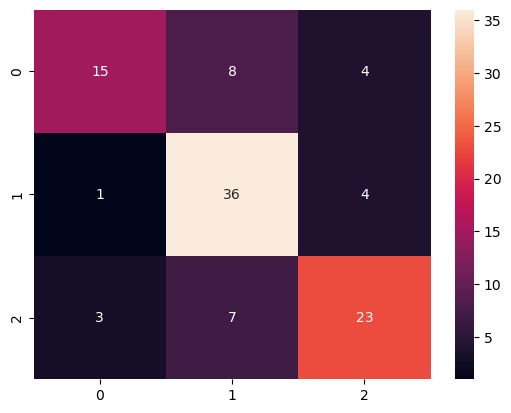

Fold 6 - Accuracy: 0.7524752475247525
Confusion matrix:


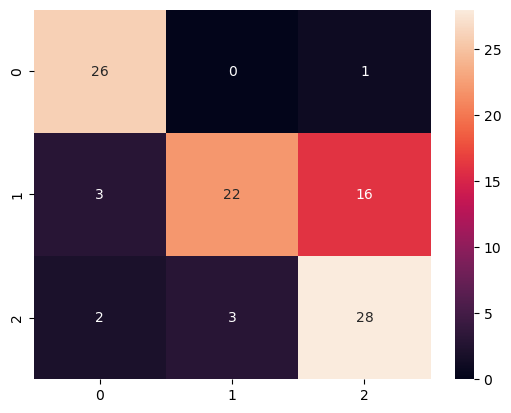

Fold 7 - Accuracy: 0.7623762376237624
Confusion matrix:


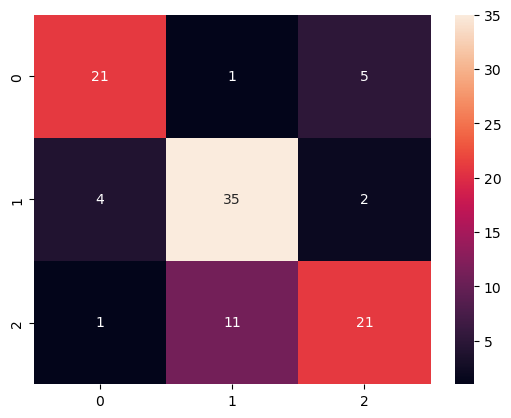

Fold 8 - Accuracy: 0.8118811881188119
Confusion matrix:


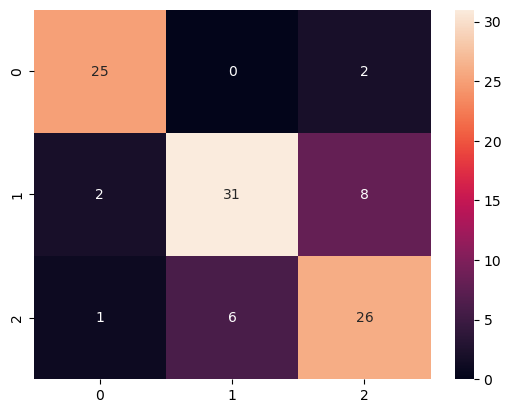

Fold 9 - Accuracy: 0.6435643564356436
Confusion matrix:


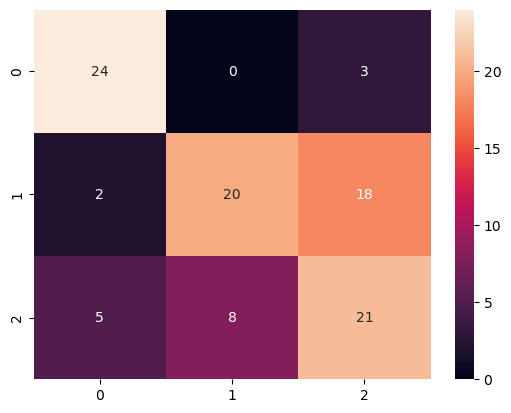

Fold 10 - Accuracy: 0.7227722772277227
Confusion matrix:


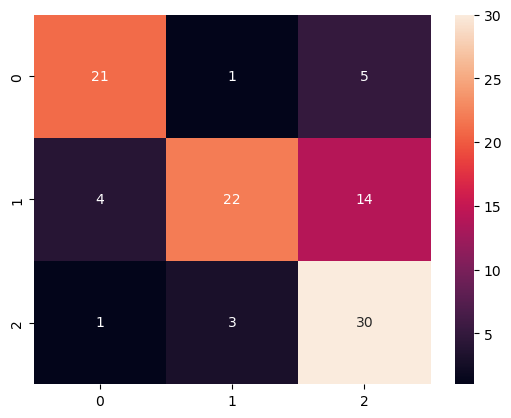

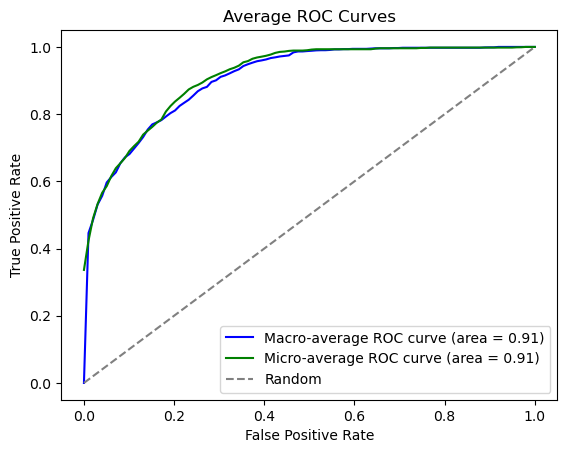

Average Accuracy: 0.7474762182100563
Average Precision: 0.7626034595755502
Average Recall: 0.7549346761781005
Average F1 Score: 0.7507057934052315


In [47]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

X = df.drop(['RiskLevel', 'BS'], axis=1)
y = df['RiskLevel']
base_classifier = DecisionTreeClassifier()
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=100)  # Increased n_estimators
skf = StratifiedKFold(n_splits=10)

accuracies = []
precisions = []
recalls = []
f1_scores = []
mean_fpr = np.linspace(0, 1, 100)
macro_tpr_list = []
micro_tpr_list = []

for fold_idx, (train_index, val_index) in enumerate(skf.split(X, y)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Fit the AdaBoost classifier
    adaboost_classifier.fit(X_train, y_train)

    # Predictions
    y_val_pred = adaboost_classifier.predict(X_val)

    # Accuracy
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(accuracy)
    print(f"Fold {fold_idx + 1} - Accuracy: {accuracy}")

    # Confusion matrix
    print("Confusion matrix:")
    cm = confusion_matrix(y_val, y_val_pred)
    sns.heatmap(cm, annot=True)
    plt.show()

    # ROC curves
    macro_tpr_fold_list = []
    for i in range(len(np.unique(y))):
        fpr, tpr, _ = roc_curve(label_binarize(y_val, classes=np.unique(y))[:, i], adaboost_classifier.predict_proba(X_val)[:, i])
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        macro_tpr_fold_list.append(interp_tpr)

    micro_fpr, micro_tpr, _ = roc_curve(label_binarize(y_val, classes=np.unique(y)).ravel(), adaboost_classifier.predict_proba(X_val).ravel())
    macro_tpr_list.extend(macro_tpr_fold_list)
    micro_tpr_list.append(np.interp(mean_fpr, micro_fpr, micro_tpr))

    # Precision, Recall, and F1 Score
    precision = precision_score(y_val, y_val_pred, average='macro')
    recall = recall_score(y_val, y_val_pred, average='macro')
    f1 = f1_score(y_val, y_val_pred, average='macro')

    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Plot average ROC curves
mean_macro_tpr = np.mean(macro_tpr_list, axis=0)
mean_micro_tpr = np.mean(micro_tpr_list, axis=0)

macro_roc_auc = auc(mean_fpr, mean_macro_tpr)
micro_roc_auc = auc(mean_fpr, mean_micro_tpr)

plt.figure()
plt.plot(mean_fpr, mean_macro_tpr, color='b', label=f'Macro-average ROC curve (area = {macro_roc_auc:.2f})')
plt.plot(mean_fpr, mean_micro_tpr, color='g', label=f'Micro-average ROC curve (area = {micro_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Average ROC Curves')
plt.legend()
plt.show()

# Display average metrics
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1_scores)

print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1 Score:", avg_f1)


Fold 1 - Accuracy: 0.8333333333333334
Confusion matrix:


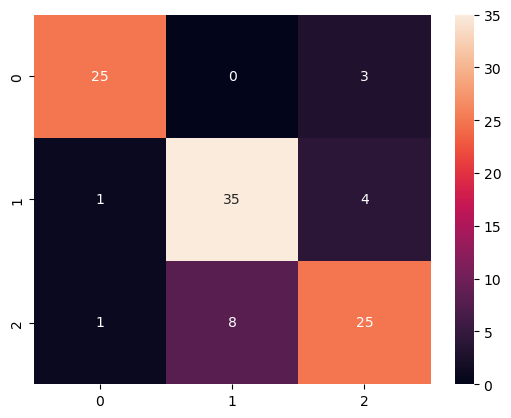

Fold 2 - Accuracy: 0.803921568627451
Confusion matrix:


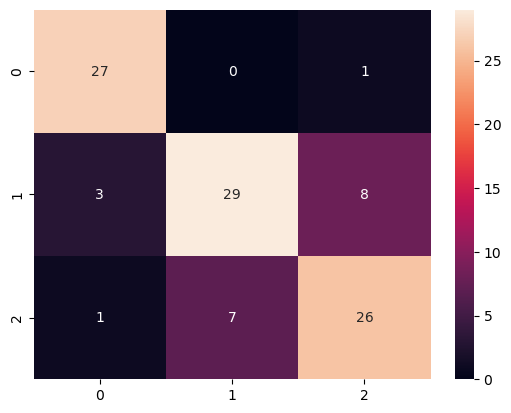

Fold 3 - Accuracy: 0.7352941176470589
Confusion matrix:


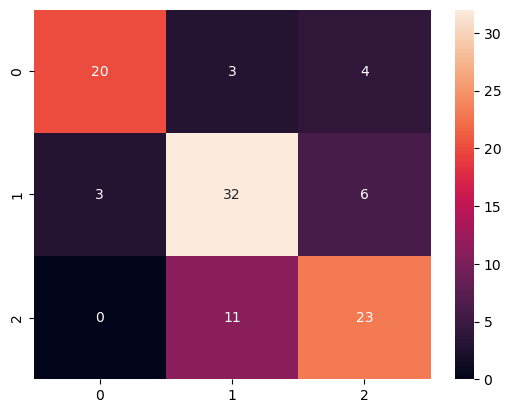

Fold 4 - Accuracy: 0.7058823529411765
Confusion matrix:


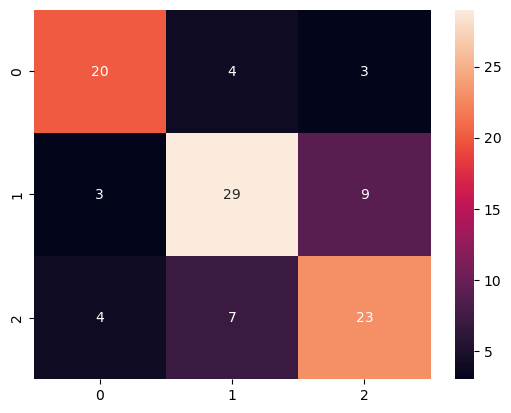

Fold 5 - Accuracy: 0.693069306930693
Confusion matrix:


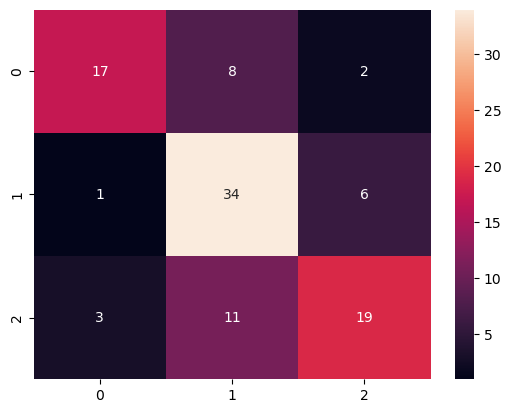

Fold 6 - Accuracy: 0.7425742574257426
Confusion matrix:


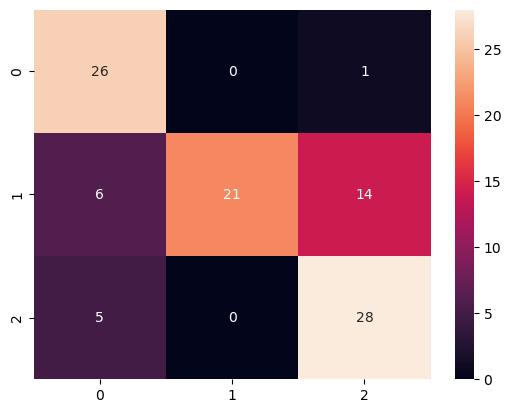

Fold 7 - Accuracy: 0.7623762376237624
Confusion matrix:


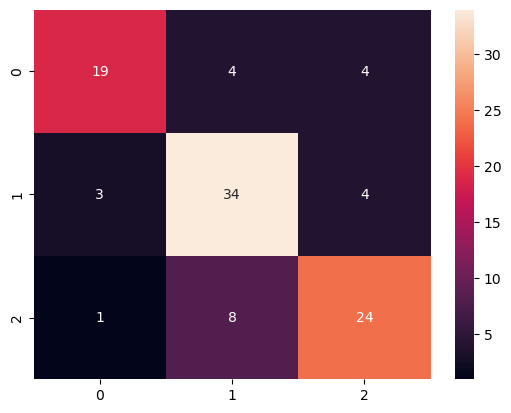

Fold 8 - Accuracy: 0.6831683168316832
Confusion matrix:


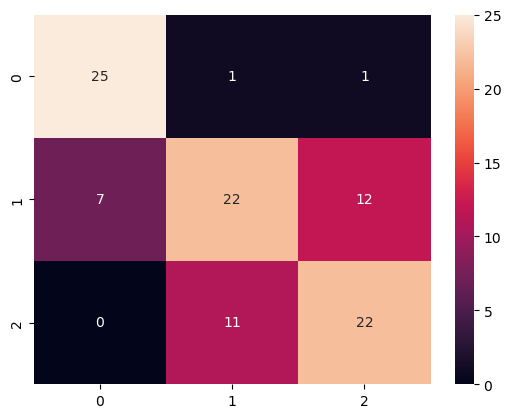

Fold 9 - Accuracy: 0.693069306930693
Confusion matrix:


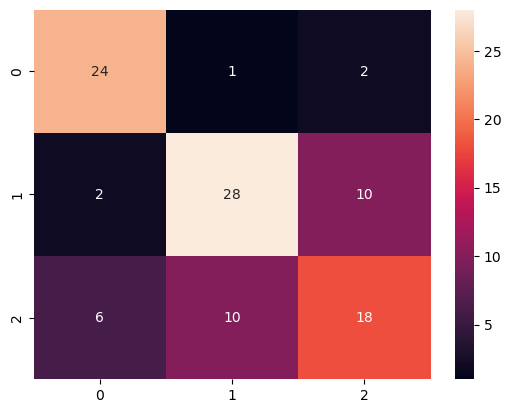

Fold 10 - Accuracy: 0.7821782178217822
Confusion matrix:


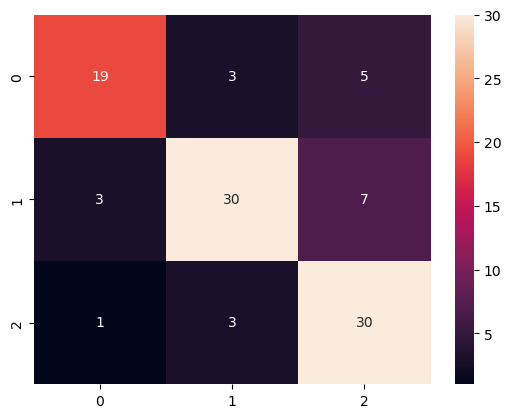

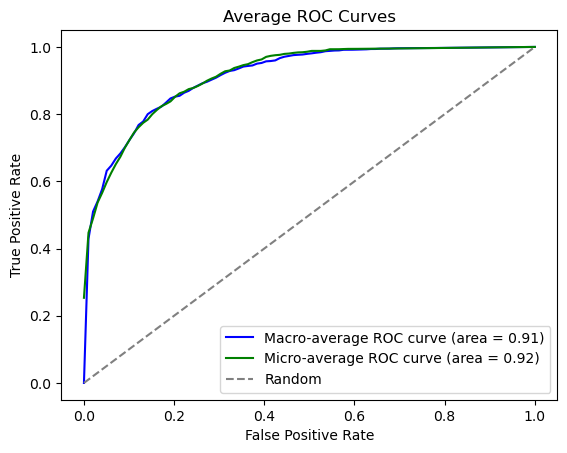

Average Accuracy: 0.7434867016113376
Average Precision: 0.7549311782296231
Average Recall: 0.7493816268397808
Average F1 Score: 0.7454895100832939


In [50]:
# PCA using Random Forest Classifier 
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

X = df.drop(['RiskLevel', 'BS'], axis=1)
y = df['RiskLevel']
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
classifier = RandomForestClassifier()
skf = StratifiedKFold(n_splits=10)

accuracies = []
precisions = []
recalls = []
f1_scores = []
mean_fpr = np.linspace(0, 1, 100)
macro_tpr_list = []
micro_tpr_list = []

for fold_idx, (train_index, val_index) in enumerate(skf.split(X_pca, y)):
    X_train, X_val = X_pca[train_index], X_pca[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    classifier.fit(X_train, y_train)
    y_val_pred = classifier.predict(X_val)
    
    accuracy = np.sum(y_val == y_val_pred) / len(y_val)
    accuracies.append(accuracy)
    print(f"Fold {fold_idx + 1} - Accuracy: {accuracy}")

    # Confusion matrix
    print("Confusion matrix:")
    cm = confusion_matrix(y_val, y_val_pred)
    sns.heatmap(cm, annot=True)
    plt.show()

    # ROC curves
    macro_tpr_fold_list = []
    for i in range(len(np.unique(y))):
        fpr, tpr, _ = roc_curve(label_binarize(y_val, classes=np.unique(y))[:, i], classifier.predict_proba(X_val)[:, i])
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        macro_tpr_fold_list.append(interp_tpr)

    micro_fpr, micro_tpr, _ = roc_curve(label_binarize(y_val, classes=np.unique(y)).ravel(), classifier.predict_proba(X_val).ravel())
    macro_tpr_list.extend(macro_tpr_fold_list)
    micro_tpr_list.append(np.interp(mean_fpr, micro_fpr, micro_tpr))

    # Precision, Recall, and F1 Score
    precision = precision_score(y_val, y_val_pred, average='macro')
    recall = recall_score(y_val, y_val_pred, average='macro')
    f1 = f1_score(y_val, y_val_pred, average='macro')

    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Plot average ROC curves
mean_macro_tpr = np.mean(macro_tpr_list, axis=0)
mean_micro_tpr = np.mean(micro_tpr_list, axis=0)

macro_roc_auc = auc(mean_fpr, mean_macro_tpr)
micro_roc_auc = auc(mean_fpr, mean_micro_tpr)

plt.figure()
plt.plot(mean_fpr, mean_macro_tpr, color='b', label=f'Macro-average ROC curve (area = {macro_roc_auc:.2f})')
plt.plot(mean_fpr, mean_micro_tpr, color='g', label=f'Micro-average ROC curve (area = {micro_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Average ROC Curves')
plt.legend()
plt.show()

# Display average metrics
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1_scores)

print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1 Score:", avg_f1)


Fold 1 - Accuracy: 0.6078431372549019
Confusion matrix:


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


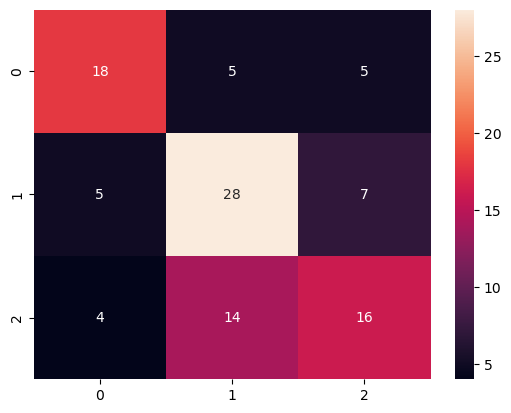

Fold 2 - Accuracy: 0.6274509803921569
Confusion matrix:


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


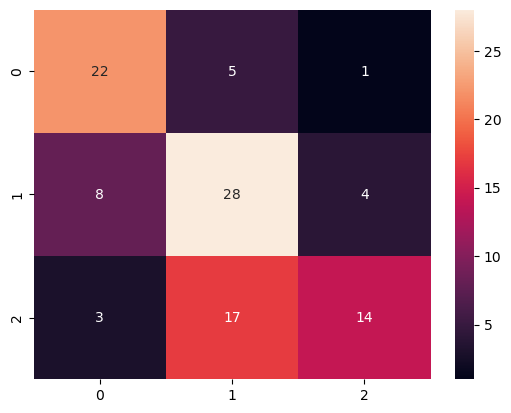

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 3 - Accuracy: 0.5294117647058824
Confusion matrix:


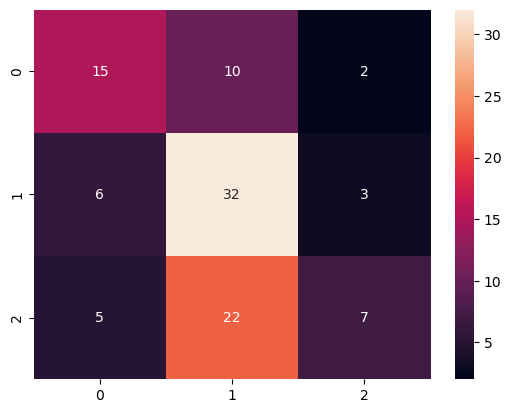

Fold 4 - Accuracy: 0.5098039215686274
Confusion matrix:


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


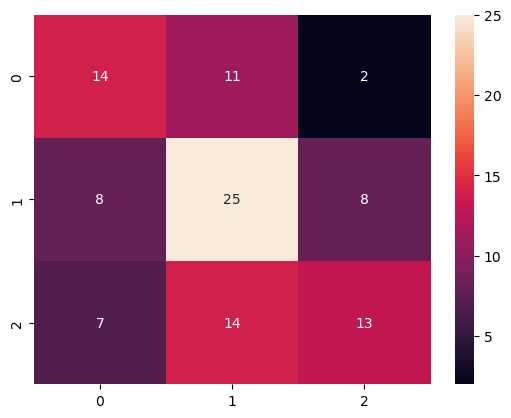

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 5 - Accuracy: 0.5544554455445545
Confusion matrix:


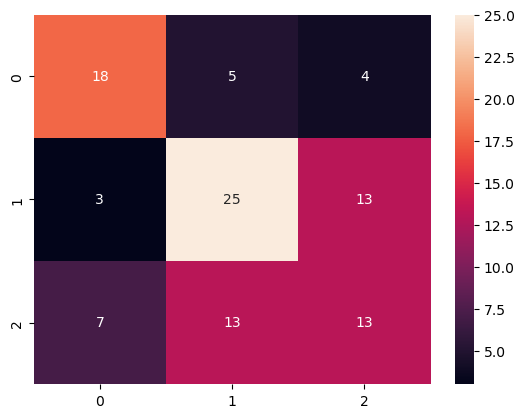

Fold 6 - Accuracy: 0.5841584158415841
Confusion matrix:


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


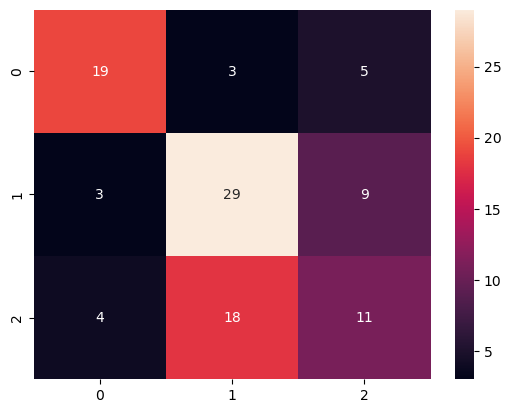

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 7 - Accuracy: 0.5247524752475248
Confusion matrix:


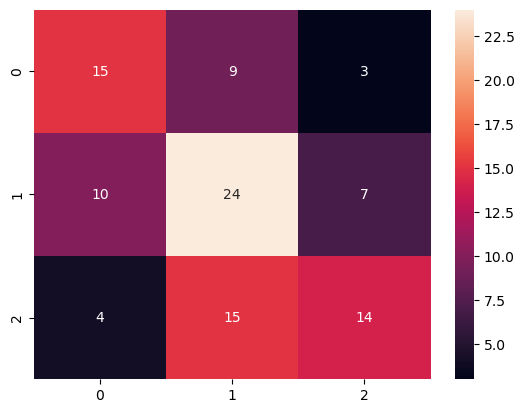

Fold 8 - Accuracy: 0.4752475247524752
Confusion matrix:


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


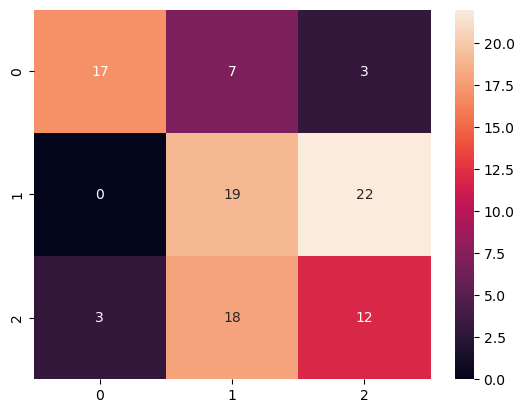

Fold 9 - Accuracy: 0.5841584158415841
Confusion matrix:


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


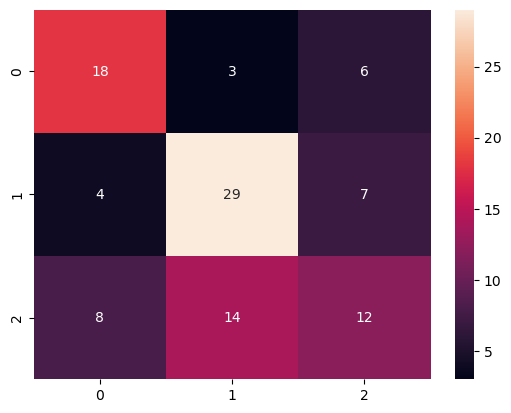

Fold 10 - Accuracy: 0.5148514851485149
Confusion matrix:


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


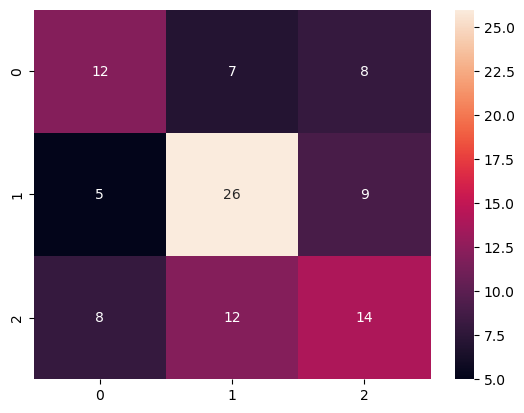

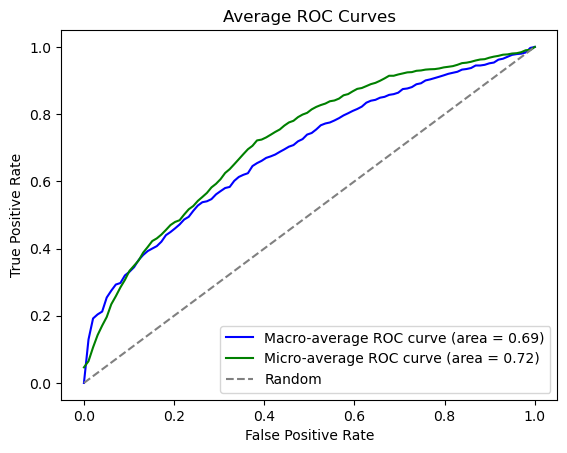

Average Accuracy: 0.5512133566297805
Average Precision: 0.561349295044064
Average Recall: 0.5483618454362118
Average F1 Score: 0.5454754204067143


In [52]:
# Gradient Descent with Logistic Regression 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

X = df.drop(['RiskLevel', 'BS'], axis=1)
y = df['RiskLevel']
logreg = LogisticRegression()
skf = StratifiedKFold(n_splits=10)

accuracies = []
precisions = []
recalls = []
f1_scores = []
mean_fpr = np.linspace(0, 1, 100)
macro_tpr_list = []
micro_tpr_list = []

for fold_idx, (train_index, val_index) in enumerate(skf.split(X, y)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    logreg.fit(X_train, y_train)
    y_val_pred = logreg.predict(X_val)
    
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(accuracy)
    print(f"Fold {fold_idx + 1} - Accuracy: {accuracy}")

    # Confusion matrix
    print("Confusion matrix:")
    cm = confusion_matrix(y_val, y_val_pred)
    sns.heatmap(cm, annot=True)
    plt.show()

    # Precision, Recall, and F1 Score
    precision = precision_score(y_val, y_val_pred, average='macro')
    recall = recall_score(y_val, y_val_pred, average='macro')
    f1 = f1_score(y_val, y_val_pred, average='macro')

    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # ROC curves
    macro_tpr_fold_list = []
    for i in range(len(np.unique(y))):
        fpr, tpr, _ = roc_curve(label_binarize(y_val, classes=np.unique(y))[:, i], logreg.decision_function(X_val)[:, i])
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        macro_tpr_fold_list.append(interp_tpr)

    micro_fpr, micro_tpr, _ = roc_curve(label_binarize(y_val, classes=np.unique(y)).ravel(), logreg.decision_function(X_val).ravel())
    macro_tpr_list.extend(macro_tpr_fold_list)
    micro_tpr_list.append(np.interp(mean_fpr, micro_fpr, micro_tpr))

# Plot average ROC curves
mean_macro_tpr = np.mean(macro_tpr_list, axis=0)
mean_micro_tpr = np.mean(micro_tpr_list, axis=0)

macro_roc_auc = auc(mean_fpr, mean_macro_tpr)
micro_roc_auc = auc(mean_fpr, mean_micro_tpr)

plt.figure()
plt.plot(mean_fpr, mean_macro_tpr, color='b', label=f'Macro-average ROC curve (area = {macro_roc_auc:.2f})')
plt.plot(mean_fpr, mean_micro_tpr, color='g', label=f'Micro-average ROC curve (area = {micro_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Average ROC Curves')
plt.legend()
plt.show()

# Display average metrics
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1_scores)

print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1 Score:", avg_f1)


4/4 [==============================] - 0s 961us/step
Fold 1 - Accuracy: 0.4803921568627451
Confusion matrix:


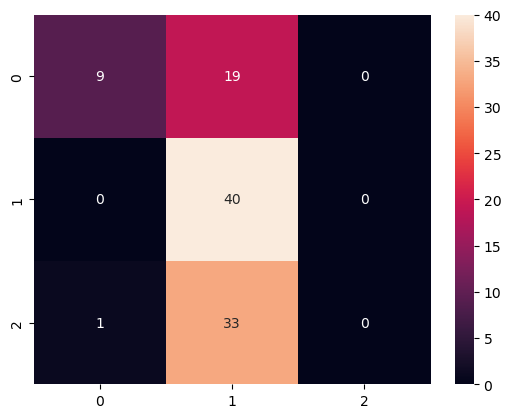

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 0s 666us/step
Fold 2 - Accuracy: 0.4803921568627451
Confusion matrix:


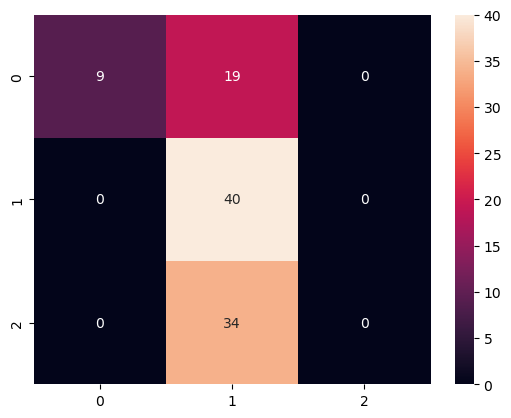

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 0s 902us/step
Fold 3 - Accuracy: 0.46078431372549017
Confusion matrix:


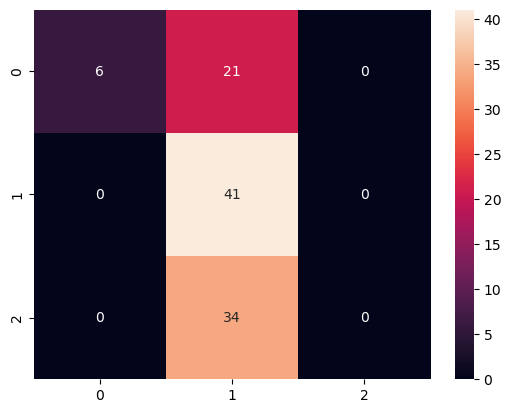

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 0s 975us/step
Fold 4 - Accuracy: 0.47058823529411764
Confusion matrix:


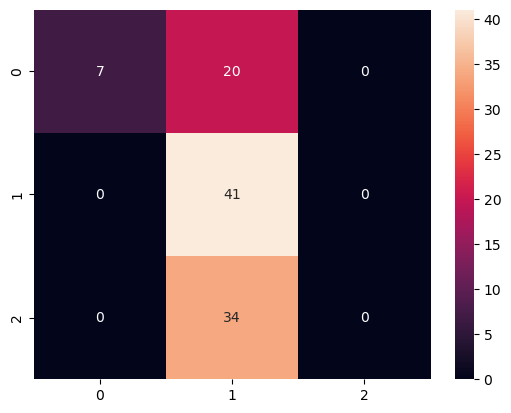

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 0s 1ms/step
Fold 5 - Accuracy: 0.504950495049505
Confusion matrix:


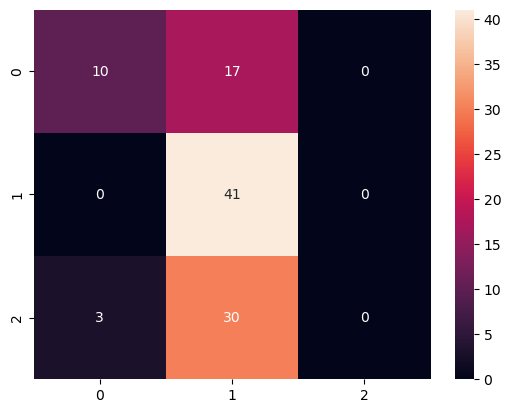

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 0s 974us/step
Fold 6 - Accuracy: 0.4752475247524752
Confusion matrix:


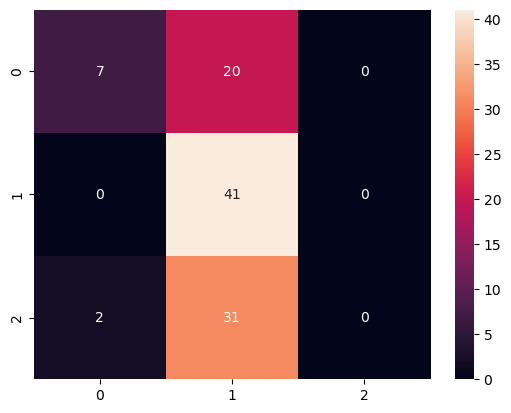

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 0s 947us/step
Fold 7 - Accuracy: 0.5247524752475248
Confusion matrix:


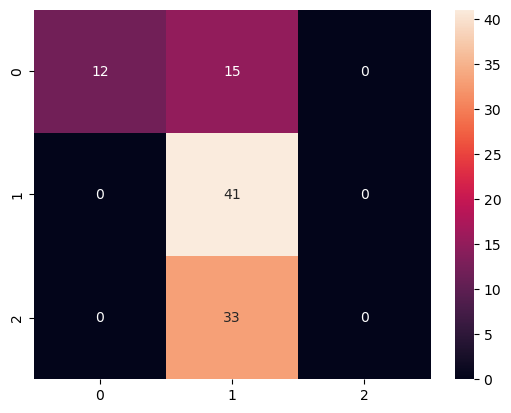

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 0s 1ms/step
Fold 8 - Accuracy: 0.5148514851485149
Confusion matrix:


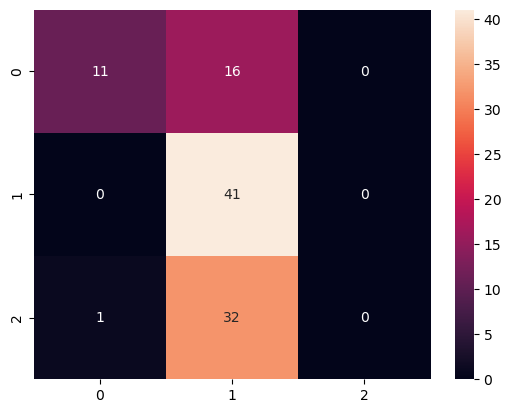

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 0s 975us/step
Fold 9 - Accuracy: 0.48514851485148514
Confusion matrix:


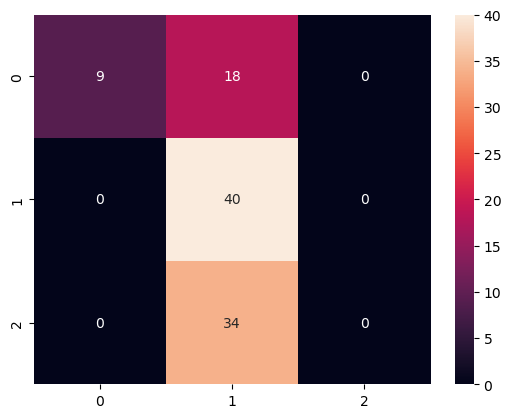

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 0s 1ms/step
Fold 10 - Accuracy: 0.5247524752475248
Confusion matrix:


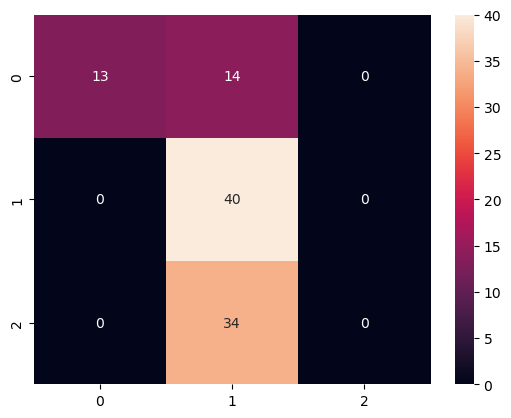

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


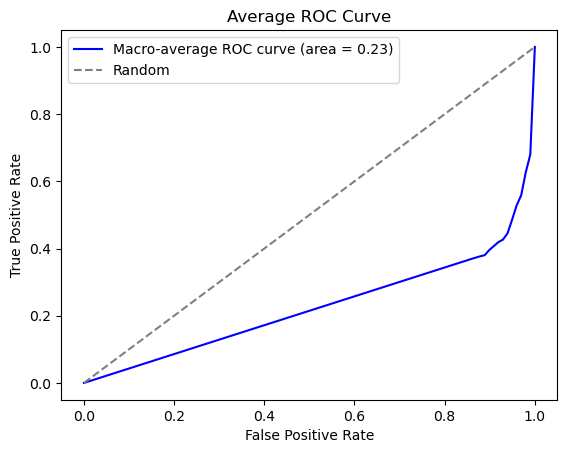

Average Accuracy: 0.4921859833042127
Average Precision: 0.46031550908747754
Average Recall: 0.4473544973544973
Average F1 Score: 0.37025976195112953


In [61]:
#Neural Network
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

df = pd.read_csv('Dataset.csv')
X = df.drop(['RiskLevel', 'BS'], axis=1)
y = df['RiskLevel']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracies = []
precisions = []
recalls = []
f1_scores = []
mean_fpr = np.linspace(0, 1, 100)
macro_tpr_list = []
micro_tpr_list = []

for fold_idx, (train_index, val_index) in enumerate(skf.split(X_scaled, y)):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y[train_index], y[val_index]

    model = create_model()
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    y_val_pred_prob = model.predict(X_val)
    y_val_pred = (y_val_pred_prob > 0.5).astype(int)

    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(accuracy)
    print(f"Fold {fold_idx + 1} - Accuracy: {accuracy}")

    # Confusion matrix
    print("Confusion matrix:")
    cm = confusion_matrix(y_val, y_val_pred)
    sns.heatmap(cm, annot=True)
    plt.show()

    # ROC curves
    macro_tpr_fold_list = []
    y_val_binarized = label_binarize(y_val, classes=np.unique(y))

    for i in range(y_val_pred_prob.shape[1]):
        fpr, tpr, _ = roc_curve(y_val_binarized[:, i], y_val_pred_prob[:, i])
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        macro_tpr_fold_list.append(interp_tpr)

    macro_tpr_list.extend(macro_tpr_fold_list)

    # Precision, Recall, and F1 Score
    precision = precision_score(y_val, y_val_pred, average='macro')
    recall = recall_score(y_val, y_val_pred, average='macro')
    f1 = f1_score(y_val, y_val_pred, average='macro')

    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Plot average ROC curves
if len(macro_tpr_list) > 0:
    mean_macro_tpr = np.mean(macro_tpr_list, axis=0)
    macro_roc_auc = auc(mean_fpr, mean_macro_tpr)

    plt.figure()
    plt.plot(mean_fpr, mean_macro_tpr, color='b', label=f'Macro-average ROC curve (area = {macro_roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Average ROC Curve')
    plt.legend()
    plt.show()

    # Display average metrics
    avg_accuracy = np.mean(accuracies)
    avg_precision = np.mean(precisions)
    avg_recall = np.mean(recalls)
    avg_f1 = np.mean(f1_scores)

    print("Average Accuracy:", avg_accuracy)
    print("Average Precision:", avg_precision)
    print("Average Recall:", avg_recall)
    print("Average F1 Score:", avg_f1)
else:
    print("Unable to calculate ROC curves due to inconsistent sample sizes.")


4/4 [==============================] - 0s 860us/step
Fold 1 - Accuracy: 0.49019607843137253
Confusion matrix:


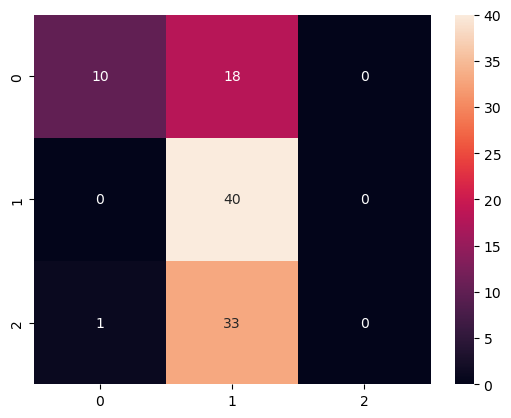

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 0s 1ms/step
Fold 2 - Accuracy: 0.47058823529411764
Confusion matrix:


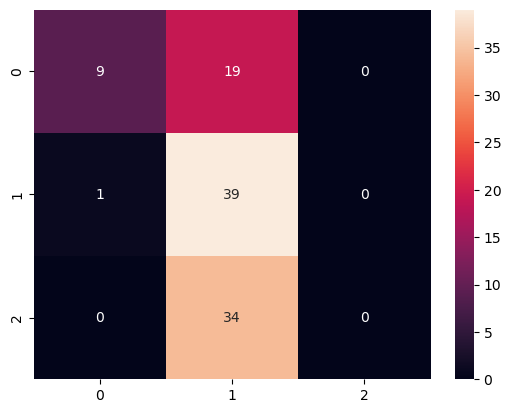

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 0s 718us/step
Fold 3 - Accuracy: 0.46078431372549017
Confusion matrix:


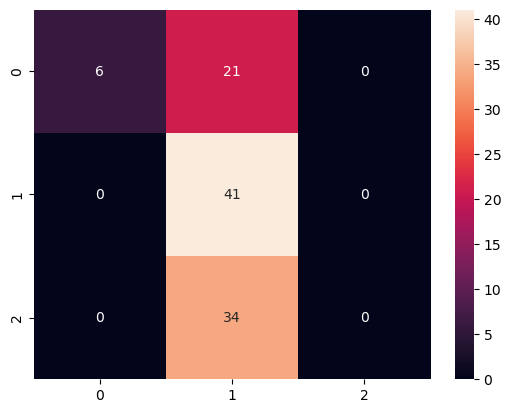

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 0s 820us/step
Fold 4 - Accuracy: 0.47058823529411764
Confusion matrix:


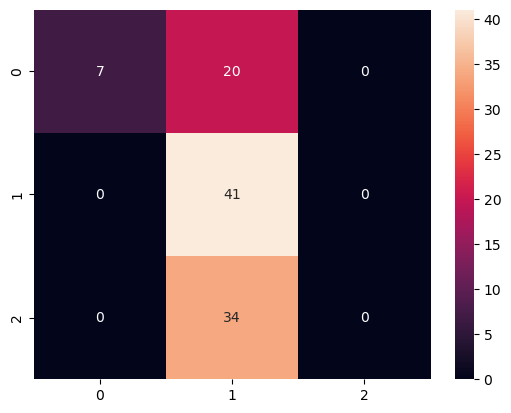

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 0s 1ms/step
Fold 5 - Accuracy: 0.5247524752475248
Confusion matrix:


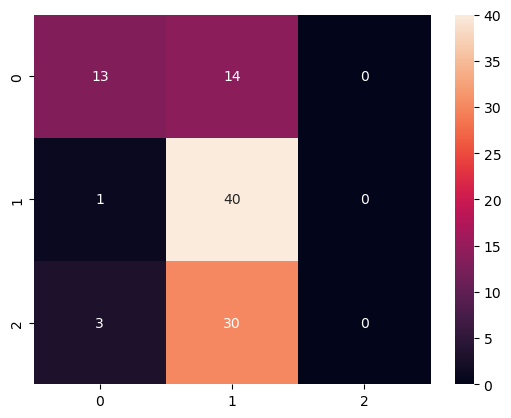

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 0s 886us/step
Fold 6 - Accuracy: 0.49504950495049505
Confusion matrix:


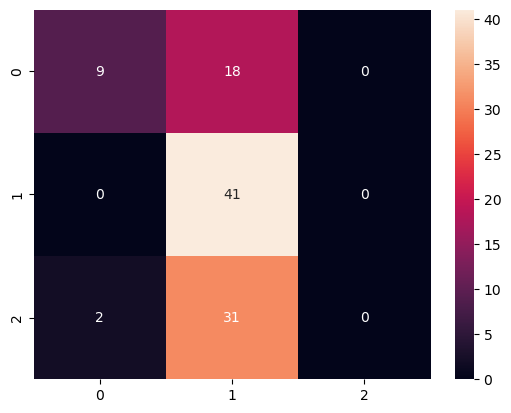

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 0s 1ms/step
Fold 7 - Accuracy: 0.5247524752475248
Confusion matrix:


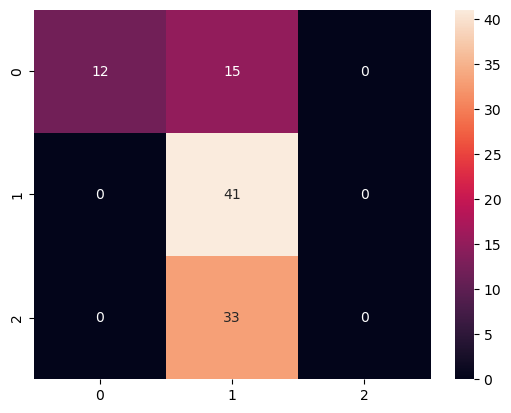

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 0s 1ms/step
Fold 8 - Accuracy: 0.49504950495049505
Confusion matrix:


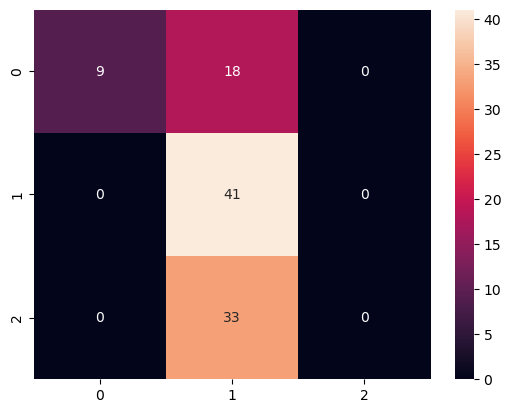

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 0s 1ms/step
Fold 9 - Accuracy: 0.4752475247524752
Confusion matrix:


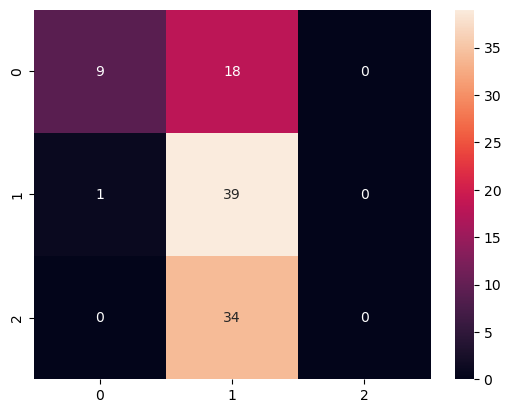

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 0s 1ms/step
Fold 10 - Accuracy: 0.49504950495049505
Confusion matrix:


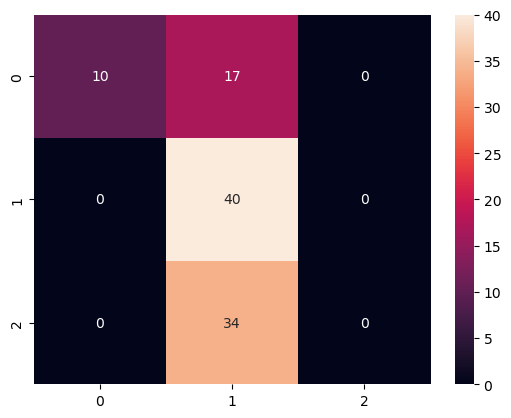

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


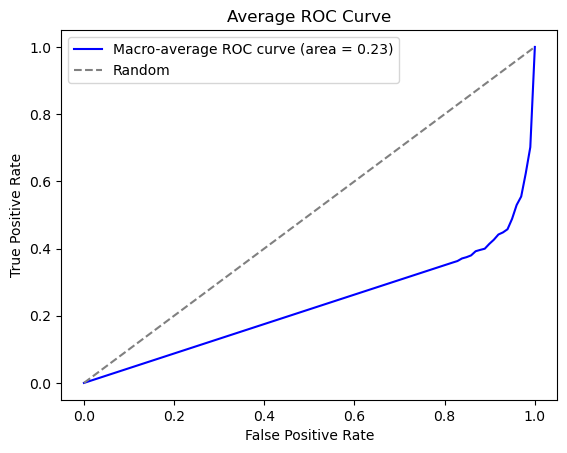

Average Accuracy: 0.4902057852844107
Average Precision: 0.4573439534820146
Average Recall: 0.44606529874822554
Average F1 Score: 0.36971199419444734


In [65]:
#MLP
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

df = pd.read_csv('Dataset.csv')
X = df.drop(['RiskLevel', 'BS'], axis=1)
y = df['RiskLevel']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def create_mlp_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracies = []
precisions = []
recalls = []
f1_scores = []
mean_fpr = np.linspace(0, 1, 100)
macro_tpr_list = []
micro_tpr_list = []

for fold_idx, (train_index, val_index) in enumerate(skf.split(X_scaled, y)):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y[train_index], y[val_index]

    mlp_model = create_mlp_model()
    mlp_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    y_val_pred_prob = mlp_model.predict(X_val)
    y_val_pred = (y_val_pred_prob > 0.5).astype(int)

    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(accuracy)
    print(f"Fold {fold_idx + 1} - Accuracy: {accuracy}")

    # Confusion matrix
    print("Confusion matrix:")
    cm = confusion_matrix(y_val, y_val_pred)
    sns.heatmap(cm, annot=True)
    plt.show()

    # ROC curves
    macro_tpr_fold_list = []
    y_val_binarized = label_binarize(y_val, classes=np.unique(y))
    for i in range(y_val_pred_prob.shape[1]):
        fpr, tpr, _ = roc_curve(y_val_binarized[:, i], y_val_pred_prob[:, i])
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        macro_tpr_fold_list.append(interp_tpr)

    macro_tpr_list.extend(macro_tpr_fold_list)

    # Precision, Recall, and F1 Score
    precision = precision_score(y_val, y_val_pred, average='macro')
    recall = recall_score(y_val, y_val_pred, average='macro')
    f1 = f1_score(y_val, y_val_pred, average='macro')

    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Plot average ROC curves
mean_macro_tpr = np.mean(macro_tpr_list, axis=0)
macro_roc_auc = auc(mean_fpr, mean_macro_tpr)

plt.figure()
plt.plot(mean_fpr, mean_macro_tpr, color='b', label=f'Macro-average ROC curve (area = {macro_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Average ROC Curve')
plt.legend()
plt.show()

# Display average metrics
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1_scores)

print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1 Score:", avg_f1)


4/4 [==============================] - 0s 992us/step
Fold 1 - Accuracy: 0.49019607843137253
Confusion matrix:


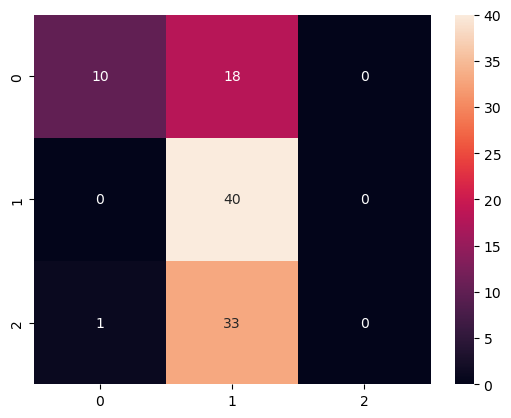

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 0s 1ms/step
Fold 2 - Accuracy: 0.4803921568627451
Confusion matrix:


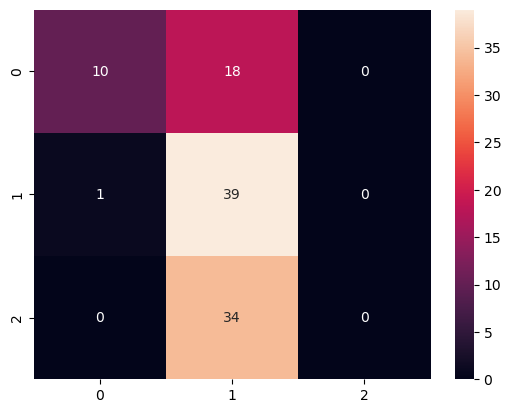

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 0s 1ms/step
Fold 3 - Accuracy: 0.47058823529411764
Confusion matrix:


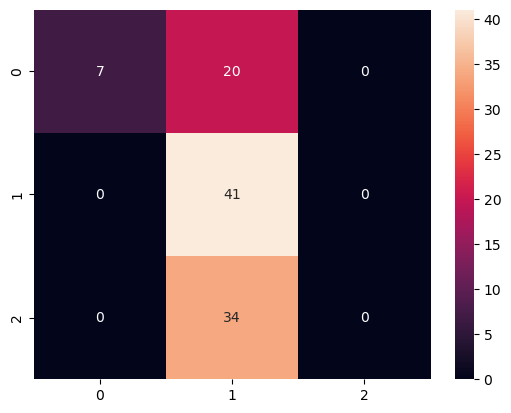

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 0s 844us/step
Fold 4 - Accuracy: 0.47058823529411764
Confusion matrix:


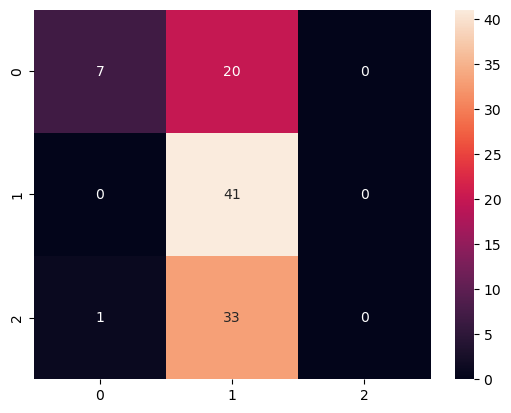

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 0s 1ms/step
Fold 5 - Accuracy: 0.5346534653465347
Confusion matrix:


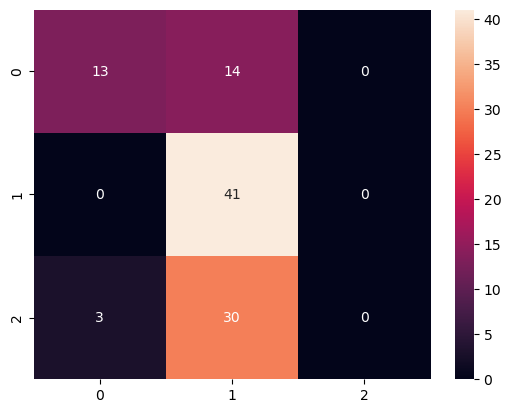

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 0s 2ms/step
Fold 6 - Accuracy: 0.4752475247524752
Confusion matrix:


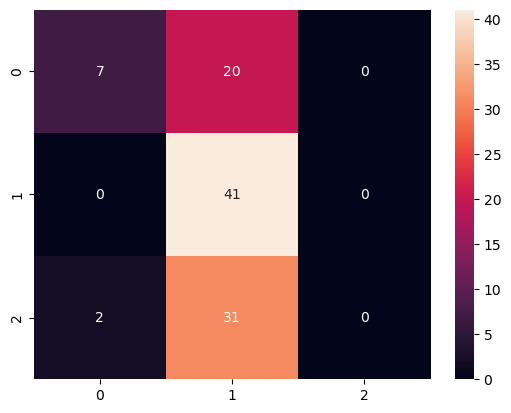

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 0s 799us/step
Fold 7 - Accuracy: 0.504950495049505
Confusion matrix:


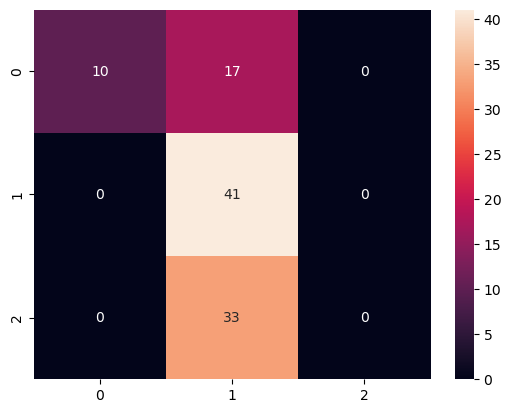

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 0s 1ms/step
Fold 8 - Accuracy: 0.49504950495049505
Confusion matrix:


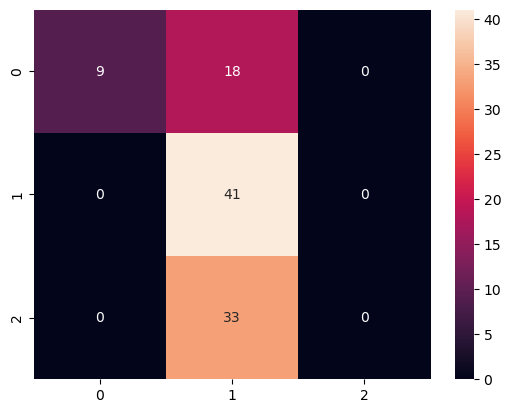

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 0s 1ms/step
Fold 9 - Accuracy: 0.48514851485148514
Confusion matrix:


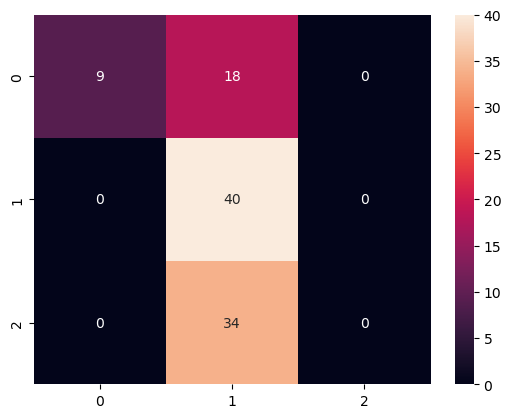

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 0s 1ms/step
Fold 10 - Accuracy: 0.5247524752475248
Confusion matrix:


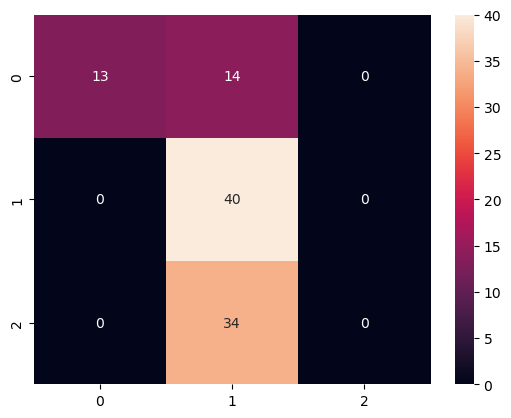

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


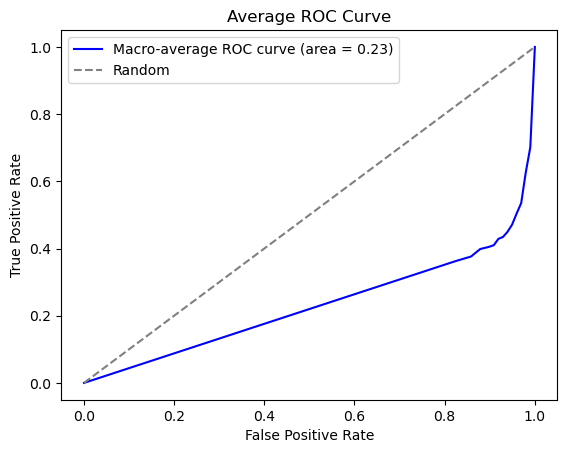

Average Accuracy: 0.4931566686080373
Average Precision: 0.45776251423396525
Average Recall: 0.4489021164021164
Average F1 Score: 0.3724696954227934


In [66]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

df = pd.read_csv('Dataset.csv')
X = df.drop(['RiskLevel', 'BS'], axis=1)
y = df['RiskLevel']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def create_ann_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracies = []
precisions = []
recalls = []
f1_scores = []
mean_fpr = np.linspace(0, 1, 100)
macro_tpr_list = []
micro_tpr_list = []

for fold_idx, (train_index, val_index) in enumerate(skf.split(X_scaled, y)):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y[train_index], y[val_index]

    ann_model = create_ann_model()
    ann_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    y_val_pred_prob = ann_model.predict(X_val)
    y_val_pred = (y_val_pred_prob > 0.5).astype(int)

    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(accuracy)
    print(f"Fold {fold_idx + 1} - Accuracy: {accuracy}")

    # Confusion matrix
    print("Confusion matrix:")
    cm = confusion_matrix(y_val, y_val_pred)
    sns.heatmap(cm, annot=True)
    plt.show()

    # ROC curves
    macro_tpr_fold_list = []
    y_val_binarized = label_binarize(y_val, classes=np.unique(y))
    for i in range(y_val_pred_prob.shape[1]):
        fpr, tpr, _ = roc_curve(y_val_binarized[:, i], y_val_pred_prob[:, i])
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        macro_tpr_fold_list.append(interp_tpr)

    macro_tpr_list.extend(macro_tpr_fold_list)

    # Precision, Recall, and F1 Score
    precision = precision_score(y_val, y_val_pred, average='macro')
    recall = recall_score(y_val, y_val_pred, average='macro')
    f1 = f1_score(y_val, y_val_pred, average='macro')

    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Plot average ROC curves
mean_macro_tpr = np.mean(macro_tpr_list, axis=0)
macro_roc_auc = auc(mean_fpr, mean_macro_tpr)

plt.figure()
plt.plot(mean_fpr, mean_macro_tpr, color='b', label=f'Macro-average ROC curve (area = {macro_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Average ROC Curve')
plt.legend()
plt.show()

# Display average metrics
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1_scores)

print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1 Score:", avg_f1)
